# Predicting March Madness

## Import Libraries

In [2]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [3]:
df_school = pd.read_csv("./school_records.csv")
df_game = pd.read_csv("./game_records.csv")

In [4]:
df_school.shape

(3125, 21)

In [5]:
df_game.shape

(47038, 6)

In [6]:
df_school.head(75)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2010.0,Air Force,20.387097,10.741935,5.677419,7.096774,27.222685,12.548387,5.000000,1.645161,...,17.645161,57.193548,63.129032,0.443,0.313,0.635,0.323,0.062500,-4.90,3.13
1,2010.0,Akron,25.057143,13.800000,6.714286,13.342857,35.875918,13.514286,6.085714,3.257143,...,19.485714,70.628571,65.514286,0.433,0.339,0.657,0.686,0.750000,2.82,-1.50
2,2010.0,Alabama A&M,22.185185,17.481481,4.000000,13.925926,36.669410,10.666667,9.222222,5.296296,...,20.370370,65.851852,69.666667,0.382,0.291,0.635,0.407,0.444444,-20.19,-13.71
3,2010.0,Alabama-Birmingham,22.441176,16.852941,5.205882,12.352941,36.342561,11.470588,6.558824,2.676471,...,17.970588,66.941176,60.382353,0.422,0.311,0.694,0.735,0.687500,9.46,2.90
4,2010.0,Alabama State,21.516129,15.290323,6.129032,12.903226,35.099896,12.903226,7.354839,4.161290,...,20.451613,64.451613,65.903226,0.404,0.324,0.641,0.516,0.666667,-14.41,-12.02
5,2010.0,Alabama,24.718750,13.593750,5.468750,12.062500,34.810547,13.406250,7.781250,3.968750,...,18.218750,68.500000,64.781250,0.441,0.350,0.707,0.531,0.375000,10.34,6.62
6,2010.0,Albany (NY),22.187500,12.281250,6.062500,12.468750,35.735352,11.875000,5.843750,3.031250,...,18.812500,62.718750,69.125000,0.409,0.332,0.721,0.219,0.125000,-11.94,-5.53
7,2010.0,Alcorn State,21.000000,14.290323,4.354839,11.483871,33.984391,8.677419,6.903226,3.161290,...,21.612903,60.645161,82.000000,0.379,0.309,0.611,0.065,0.111111,-30.36,-9.00
8,2010.0,American,21.967742,12.741935,5.935484,9.806452,35.070760,14.419355,3.516129,2.612903,...,19.032258,62.612903,67.193548,0.425,0.345,0.692,0.355,0.500000,-11.47,-6.89
9,2010.0,Appalachian State,25.783784,15.648649,7.540541,11.108108,38.186267,12.081081,5.432432,2.756757,...,17.621622,74.756757,69.378378,0.476,0.397,0.738,0.649,0.722222,1.80,-2.76


In [7]:
df_game.head(40)

,year,team_1_name,team_1_score,team_2_name,team_2_score,date_string
0,2010,Arkansas-Pine Bluff,61.0,Winthrop,44.0,Mar16
1,2010,Arkansas-Pine Bluff,44.0,Duke,73.0,Mar19
2,2010,Baylor,68.0,Sam Houston State,59.0,Mar18
3,2010,Baylor,76.0,Old Dominion,68.0,Mar20
4,2010,Baylor,72.0,Saint Mary's (CA),49.0,Mar26
5,2010,Baylor,71.0,Duke,78.0,Mar28
6,2010,Brigham Young,99.0,Florida,92.0,Mar18
7,2010,Brigham Young,72.0,Kansas State,84.0,Mar20
8,2010,Butler,77.0,Texas-El Paso,59.0,Mar18
9,2010,Butler,54.0,Murray State,52.0,Mar20


In [8]:
df_school.tail()

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
3120,2018.0,Wright State,25.117647,15.058824,6.852941,10.176471,36.024221,13.264706,6.647059,2.205882,...,15.911765,72.147059,65.705882,0.436,0.342,0.717,0.735,0.777778,0.78,-4.38
3121,2018.0,Wyoming,26.454545,17.666667,9.212121,7.000000,34.575758,15.696970,6.515152,3.939394,...,19.818182,79.787879,78.696970,0.446,0.345,0.738,0.606,0.555556,4.61,3.89
3122,2018.0,Xavier,28.878788,18.696970,7.818182,9.757576,38.098255,16.636364,5.848485,2.939394,...,16.909091,84.272727,74.484848,0.491,0.369,0.790,0.848,0.833333,19.69,9.90
3123,2018.0,Yale,27.000000,12.933333,8.233333,8.933333,33.868889,16.700000,6.433333,3.033333,...,17.633333,75.166667,73.600000,0.468,0.335,0.721,0.533,0.642857,-3.37,-2.75
3124,2018.0,Youngstown State,28.187500,11.593750,7.343750,14.281250,35.772461,13.906250,8.312500,3.937500,...,21.000000,75.312500,82.718750,0.427,0.330,0.636,0.250,0.333333,-13.66,-2.56


## Check for null values

In [9]:
df_school.isnull().values.any()

False

In [10]:
df_game.isnull().values.any()

False

In [138]:
df_school[(df_school['year'] == 2011) & (df_school['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
334,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


In [ ]:
def resolve_team_name(team_name):
    #Apply hard-coded corrections to team names
    team_name_dict = {'Colorado-Colorado Springs':'Colorado',
                     'Colorado College': 'Colorado'}
    if(team_name in team_name_dict):
        return team_name_dict[team_name]

    return team_name
def get_school_stats(year, team_name):
    return df_school[(df_school['year'] == year) & (df_school['team_name'] == team_name)]
def get_vals(t_stats_list, key):
    ret = []
    for t_stat in t_stats_list:
        ret.append(t_stat[key].squeeze())
    return ret
def get_team_stats_dict_with_t1_win(t1_stats, t2_stats, t1_wins):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos'),
            't1_win':t1_wins}
def get_team_stats_dict(t1_stats, t2_stats):
    return {'team_name_1':get_vals(t1_stats,'team_name'),'fg_pg_1':get_vals(t1_stats,'fg_pg'),'ft_pg_1':get_vals(t1_stats,'ft_pg'),
            'three_pt_pg_1':get_vals(t1_stats,'three_pt_pg'),'orb_pg_1':get_vals(t1_stats,'orb_pg'),'drb_pg_1':get_vals(t1_stats,'drb_pg'),
            'ast_pg_1':get_vals(t1_stats,'ast_pg'),'stl_pg_1':get_vals(t1_stats,'stl_pg'),'blk_pg_1':get_vals(t1_stats,'blk_pg'),
            'tov_pg_1':get_vals(t1_stats,'tov_pg'),'pf_pg_1':get_vals(t1_stats,'pf_pg'), 'pt_pg_1':get_vals(t1_stats,'pt_pg'),
            'opnt_pt_pg_1':get_vals(t1_stats,'opnt_pt_pg'),'fg_pct_1':get_vals(t1_stats,'fg_pct'),'three_p_pct_1':get_vals(t1_stats,'three_p_pct'),
            'ft_pct_1':get_vals(t1_stats,'ft_pct'),'wl_pct_1':get_vals(t1_stats,'wl_pct'),'conf_wl_pct_1':get_vals(t1_stats,'conf_wl_pct'),
            'srs_1':get_vals(t1_stats,'srs'),'sos_1':get_vals(t1_stats,'sos'),
            'team_name_2':get_vals(t2_stats,'team_name'),'fg_pg_2':get_vals(t2_stats,'fg_pg'),'ft_pg_2':get_vals(t2_stats,'ft_pg'),
            'three_pt_pg_2':get_vals(t2_stats,'three_pt_pg'),'orb_pg_2':get_vals(t2_stats,'orb_pg'),'drb_pg_2':get_vals(t2_stats,'drb_pg'),
            'ast_pg_2':get_vals(t2_stats,'ast_pg'),'stl_pg_2':get_vals(t2_stats,'stl_pg'),'blk_pg_2':get_vals(t2_stats,'blk_pg'),
            'tov_pg_2':get_vals(t2_stats,'tov_pg'),'pf_pg_2':get_vals(t2_stats,'pf_pg'), 'pt_pg_2':get_vals(t2_stats,'pt_pg'),
            'opnt_pt_pg_2':get_vals(t2_stats,'opnt_pt_pg'),'fg_pct_2':get_vals(t2_stats,'fg_pct'),'three_p_pct_2':get_vals(t2_stats,'three_p_pct'),
            'ft_pct_2':get_vals(t2_stats,'ft_pct'),'wl_pct_2':get_vals(t2_stats,'wl_pct'),'conf_wl_pct_2':get_vals(t2_stats,'conf_wl_pct'),
            'srs_2':get_vals(t2_stats,'srs'),'sos_2':get_vals(t2_stats,'sos')}
def create_team_stats_df_w_t1_win(indeces_w_stats, t1_stats_list, t2_stats_list,t1_wins):
    #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict_with_t1_win(t1_stats_list, t2_stats_list,t1_wins), index = indeces_w_stats)
def create_team_stats_df(indeces_w_stats, t1_stats_list, t2_stats_list):
    #Assumes all lists are of the same length
    return pd.DataFrame(get_team_stats_dict(t1_stats_list, t2_stats_list), index = indeces_w_stats)
    

In [141]:

indeces_w_stats = []
indeces_wo_stats = []
t1_stats_list = []
t2_stats_list = []
t1_wins_list = []
for index, row in df_game.iterrows():
    year = row['year']
    team_1 = row['team_1_name']
    team_2 = row['team_2_name']
    team_1_score = row['team_1_score']
    team_2_score = row['team_2_score']
    t1_stats = get_school_stats(year, resolve_team_name(team_1))
    t2_stats = get_school_stats(year, resolve_team_name(team_2))

    if(len(t1_stats) > 0 and len(t2_stats) > 0):  
        indeces_w_stats.append(index)
        t1_stats_list.append(t1_stats)
        t2_stats_list.append(t2_stats)
        t1_wins_list.append(team_1_score > team_2_score)
    else:
        indeces_wo_stats.append(index)
        print(year)
        print(team_1)
        print(team_2)
print(len(indeces_w_stats))
        

2010
Arkansas-Pine Bluff
Winthrop
2010
Arkansas-Pine Bluff
Duke
2010
Baylor
Sam Houston State
2010
Baylor
Old Dominion
2010
Baylor
Saint Mary's (CA)
2010
Baylor
Duke
2010
Brigham Young
Florida
2010
Brigham Young
Kansas State
2010
Butler
Texas-El Paso
2010
Butler
Murray State
2010
Butler
Syracuse
2010
Butler
Kansas State
2010
Butler
Michigan State
2010
Butler
Duke
2010
UC-Santa Barbara
Ohio State
2010
University of California
Louisville
2010
University of California
Duke
2010
Clemson
Missouri
2010
Cornell
Temple
2010
Cornell
Wisconsin
2010
Cornell
Kentucky
2010
Duke
Purdue
2010
Duke
West Virginia
2010
East Tennessee State
Kentucky
2010
Florida State
Gonzaga
2010
Georgetown
Ohio
2010
Georgia Tech
Oklahoma State
2010
Georgia Tech
Ohio State
2010
Gonzaga
Syracuse
2010
Houston
Maryland
2010
Kansas State
North Texas
2010
Kansas State
Xavier
2010
Kansas
Lehigh
2010
Kansas
Northern Iowa
2010
Kentucky
Wake Forest
2010
Kentucky
West Virginia
2010
Marquette
Washington
2010
Maryland
Michigan State

2011
Arkansas State
Belmont
2011
Arkansas State
Memphis
2011
Arkansas State
Lyon
2011
Arkansas State
Georgia
2011
Arkansas State
Central Baptist
2011
Arkansas
Texas A&M
2011
Arkansas
Texas
2011
Arkansas
Tennessee
2011
Arkansas
Florida
2011
Arkansas
Vanderbilt
2011
Arkansas
Georgia
2011
Arkansas
Kentucky
2011
Arkansas
Tennessee
2011
Army
Vassar
2011
Army
Long Island University
2011
Army
Bucknell
2011
Army
Bucknell
2011
Army
Bucknell
2011
Auburn
North Carolina-Asheville
2011
Auburn
Georgia Southwestern
2011
Auburn
Florida State
2011
Auburn
Kentucky
2011
Auburn
Florida
2011
Auburn
Tennessee
2011
Auburn
Georgia
2011
Auburn
Vanderbilt
2011
Auburn
Georgia
2011
Austin Peay
Purdue
2011
Austin Peay
Oakland
2011
Austin Peay
Fontbonne
2011
Austin Peay
Memphis
2011
Austin Peay
Morehead State
2011
Austin Peay
Brescia
2011
Austin Peay
Morehead State
2011
Austin Peay
Morehead State
2011
Ball State
Indiana State
2011
Ball State
Butler
2011
Ball State
St. John's (NY)
2011
Ball State
Alaska-Anchorage
20

2011
UC-Santa Barbara
Denver
2011
UC-Santa Barbara
North Dakota State
2011
UC-Santa Barbara
Oregon
2011
UC-Santa Barbara
Fresno State
2011
UC-Santa Barbara
Portland
2011
UC-Santa Barbara
Loyola Marymount
2011
UC-Santa Barbara
Santa Clara
2011
UC-Santa Barbara
Nevada-Las Vegas
2011
UC-Santa Barbara
San Diego State
2011
UC-Santa Barbara
California Baptist
2011
UC-Santa Barbara
Long Beach State
2011
UC-Santa Barbara
Fresno Pacific
2011
UC-Santa Barbara
Pacific
2011
UC-Santa Barbara
Pacific
2011
UC-Santa Barbara
Long Beach State
2011
UC-Santa Barbara
Pacific
2011
UC-Santa Barbara
Long Beach State
2011
UC-Santa Barbara
Florida
2011
University of California
Temple
2011
University of California
Notre Dame
2011
University of California
San Diego State
2011
University of California
Kansas
2011
University of California
Washington
2011
University of California
UCLA
2011
University of California
Southern California
2011
University of California
Washington
2011
University of California
Southern Cal

2011
Delaware State
Hampton
2011
Delaware State
Hampton
2011
Delaware
Old Dominion
2011
Delaware
Hampton
2011
Delaware
Villanova
2011
Delaware
George Mason
2011
Delaware
George Mason
2011
Delaware
Old Dominion
2011
Delaware
Virginia Commonwealth
2011
Delaware
Old Dominion
2011
Denver
Utah State
2011
Denver
Northern Colorado
2011
DePaul
Indiana State
2011
DePaul
Georgetown
2011
DePaul
West Virginia
2011
DePaul
Marquette
2011
DePaul
Pittsburgh
2011
DePaul
Notre Dame
2011
DePaul
Louisville
2011
DePaul
West Virginia
2011
DePaul
Villanova
2011
DePaul
St. John's (NY)
2011
DePaul
Syracuse
2011
Detroit Mercy
Syracuse
2011
Detroit Mercy
Indiana Tech
2011
Drake
St. John's (NY)
2011
Drake
Indiana State
2011
Drake
Indiana State
2011
Drexel
Louisville
2011
Drexel
Syracuse
2011
Drexel
Virginia Commonwealth
2011
Drexel
Old Dominion
2011
Drexel
George Mason
2011
Drexel
Virginia Commonwealth
2011
Drexel
Virginia Commonwealth
2011
Duke
Princeton
2011
Duke
Miami (OH)
2011
Duke
Marquette
2011
Duke
Kansas 

2011
Georgia Tech
Syracuse
2011
Georgia Tech
Georgia
2011
Georgia Tech
Richmond
2011
Georgia Tech
North Carolina
2011
Georgia
Mississippi Valley State
2011
Georgia
Saint Louis
2011
Georgia
Notre Dame
2011
Georgia
Temple
2011
Georgia
Manhattan
2011
Georgia
High Point
2011
Georgia
Mercer
2011
Georgia
Kentucky
2011
Georgia
Vanderbilt
2011
Georgia
Mississippi
2011
Georgia
Tennessee
2011
Georgia
Mississippi State
2011
Georgia
Kentucky
2011
Georgia
Xavier
2011
Georgia
South Carolina
2011
Georgia
Vanderbilt
2011
Georgia
Tennessee
2011
Georgia
South Carolina
2011
Georgia
Louisiana State
2011
Georgia
Washington
2011
Gonzaga
Southern
2011
Gonzaga
IUPUI
2011
Gonzaga
San Diego State
2011
Gonzaga
Kansas State
2011
Gonzaga
Marquette
2011
Gonzaga
Illinois
2011
Gonzaga
Washington State
2011
Gonzaga
Notre Dame
2011
Gonzaga
Lewis & Clark
2011
Gonzaga
Xavier
2011
Gonzaga
Lafayette
2011
Gonzaga
Oklahoma State
2011
Gonzaga
Wake Forest
2011
Gonzaga
Portland
2011
Gonzaga
Pepperdine
2011
Gonzaga
Loyola Marymo

2011
Lafayette
Long Island University
2011
Lamar
Lyon
2011
Lamar
St. Gregory's
2011
Lamar
Texas
2011
Lamar
Huston-Tillotson
2011
Lamar
Louisiana College
2011
Lamar
Texas-San Antonio
2011
Lehigh
Penn State
2011
Lehigh
Southern California
2011
Lehigh
Saint Peter's
2011
Liberty
Virginia Intermont
2011
Liberty
Notre Dame
2011
Liberty
Southern Virginia
2011
Liberty
Union (KY)
2011
Liberty
North Carolina-Asheville
2011
Liberty
Virginia Military Institute
2011
Liberty
North Carolina-Asheville
2011
Liberty
Virginia Military Institute
2011
Lipscomb
North Carolina
2011
Lipscomb
Stillman
2011
Lipscomb
Memphis
2011
Long Beach State
San Diego State
2011
Long Beach State
San Francisco State
2011
Long Beach State
Saint Peter's
2011
Long Beach State
Washington
2011
Long Beach State
Brigham Young-Hawaii
2011
Long Beach State
Utah State
2011
Long Beach State
North Carolina
2011
Long Island University
Norfolk State
2011
Long Island University
Texas State
2011
Long Island University
Manhattan
2011
Long Is

2011
Montana State
Minot State
2011
Montana State
Johnson & Wales (CO)
2011
Montana State
UCLA
2011
Montana State
Northern Colorado
2011
Montana State
Northern Colorado
2011
Montana
Montana Tech
2011
Montana
UCLA
2011
Montana
Great Falls
2011
Montana
Northern Colorado
2011
Montana
Northern Colorado
2011
Montana
Northern Colorado
2011
Morehead State
Asbury
2011
Morehead State
North Carolina A&T
2011
Morehead State
North Carolina-Wilmington
2011
Morehead State
Ohio State
2011
Morehead State
Southern Illinois-Edwardsville
2011
Morehead State
Tennessee-Martin
2011
Morehead State
Murray State
2011
Morehead State
St. Catharine
2011
Morehead State
Northern Iowa
2011
Morehead State
Tennessee State
2011
Morehead State
Tennessee Tech
2011
Morehead State
Southeast Missouri State
2011
Morehead State
Tennessee State
2011
Morehead State
Tennessee Tech
2011
Morehead State
Southeast Missouri State
2011
Morehead State
Murray State
2011
Morehead State
Tennessee-Martin
2011
Morehead State
Tennessee Tech


2011
Oregon
Southern California
2011
Oregon
UCLA
2011
Oregon
Washington
2011
Oregon
UCLA
2011
Oregon
Southern California
2011
Oregon
UCLA
2011
Oregon
Washington
2011
Pacific
UCLA
2011
Pacific
William Jessup
2011
Pacific
Texas A&M
2011
Pacific
Cal State Stanislaus
2011
Penn State
Saint Joseph's
2011
Penn State
Virginia Tech
2011
Penn State
Purdue
2011
Penn State
Purdue
2011
Penn State
Wisconsin
2011
Penn State
Wisconsin
2011
Penn State
Wisconsin
2011
Penn State
Temple
2011
Pennsylvania
Pittsburgh
2011
Pennsylvania
Villanova
2011
Pennsylvania
Temple
2011
Pennsylvania
Princeton
2011
Pennsylvania
Princeton
2011
Pepperdine
UCLA
2011
Pepperdine
Texas-San Antonio
2011
Pepperdine
Redlands
2011
Pittsburgh
Rhode Island
2011
Pittsburgh
Texas
2011
Pittsburgh
Robert Morris
2011
Pittsburgh
Rider
2011
Pittsburgh
Tennessee
2011
Pittsburgh
Providence
2011
Pittsburgh
Seton Hall
2011
Pittsburgh
Syracuse
2011
Pittsburgh
Rutgers
2011
Pittsburgh
West Virginia
2011
Pittsburgh
Villanova
2011
Pittsburgh
South 

2011
Texas A&M-Corpus Christi
Montreat
2011
Texas A&M-Corpus Christi
Texas-San Antonio
2011
Texas A&M-Corpus Christi
Texas-San Antonio
2011
Texas A&M
Texas A&M-International
2011
Texas A&M
Washington
2011
Texas A&M
Wagner
2011
Texas A&M
Texas
2011
Texas A&M
Texas
2011
Texas A&M
Texas Tech
2011
Texas A&M
Texas Tech
2011
Texas A&M
Texas
2011
Texas-Arlington
Texas Lutheran
2011
Texas-Arlington
Texas-Tyler
2011
Texas-Arlington
Hardin-Simmons
2011
Texas-Arlington
St. Edward's
2011
Texas-Arlington
Texas-San Antonio
2011
Texas-Arlington
Texas-San Antonio
2011
Texas-El Paso
Western New Mexico
2011
Texas-Rio Grande Valley
SUNY-Cobleskill
2011
Texas-Rio Grande Valley
Victory
2011
Texas-Rio Grande Valley
St. Thomas (TX)
2011
Texas-San Antonio
Huston-Tillotson
2011
Texas-San Antonio
Cameron
2011
Texas-San Antonio
Troy
2011
Texas-San Antonio
Tulsa
2011
Texas-San Antonio
Texas State
2011
Texas-San Antonio
Panhandle State
2011
Texas-San Antonio
Texas State
2011
Texas State
Sul Ross State
2011
Texas S

2012
Baylor
Texas
2012
Baylor
Texas A&M
2012
Baylor
Oklahoma State
2012
Baylor
Kansas
2012
Baylor
Missouri
2012
Baylor
Iowa State
2012
Baylor
Kansas State
2012
Baylor
Texas
2012
Baylor
Oklahoma
2012
Baylor
Texas Tech
2012
Baylor
Iowa State
2012
Baylor
Kansas State
2012
Baylor
Kansas
2012
Baylor
Missouri
2012
Baylor
South Dakota State
2012
Baylor
Colorado
2012
Baylor
Xavier
2012
Baylor
Kentucky
2012
Belmont
Duke
2012
Belmont
Memphis
2012
Belmont
Towson
2012
Belmont
Middle Tennessee
2012
Belmont
Trevecca Nazarene
2012
Belmont
Kennesaw State
2012
Belmont
Mercer
2012
Belmont
Tennessee State
2012
Belmont
Middle Tennessee
2012
Belmont
Troy
2012
Belmont
Miami (OH)
2012
Belmont
Marshall
2012
Belmont
Marshall
2012
Belmont
North Florida
2012
Belmont
Jacksonville
2012
Belmont
Lipscomb
2012
Belmont
Stetson
2012
Belmont
Florida Gulf Coast
2012
Belmont
South Carolina Upstate
2012
Belmont
East Tennessee State
2012
Belmont
Jacksonville
2012
Belmont
North Florida
2012
Belmont
Lipscomb
2012
Belmont
Flor

2012
Central Michigan
Ohio
2012
Charleston Southern
Kansas State
2012
Charleston Southern
Wichita State
2012
Charleston Southern
Bluefield College (VA)
2012
Charleston Southern
Milligan
2012
Charleston Southern
Virginia Military Institute
2012
Charleston Southern
Florida State
2012
Charleston Southern
Erskine
2012
Charleston Southern
North Carolina-Asheville
2012
Charleston Southern
Virginia Military Institute
2012
Charleston Southern
North Carolina-Asheville
2012
Charlotte
Lamar
2012
Charlotte
Davidson
2012
Charlotte
Memphis
2012
Charlotte
Saint Louis
2012
Charlotte
Temple
2012
Charlotte
Xavier
2012
Charlotte
St. Bonaventure
2012
Charlotte
Xavier
2012
Chattanooga
Indiana
2012
Chattanooga
Warren Wilson
2012
Chattanooga
Spalding
2012
Chattanooga
Kentucky
2012
Chattanooga
Hiwassee
2012
Chattanooga
Davidson
2012
Chattanooga
Davidson
2012
Chicago State
Creighton
2012
Chicago State
Wichita State
2012
Chicago State
Cincinnati
2012
Chicago State
San Diego State
2012
Chicago State
St. Francis 

2012
Denver
Western Kentucky
2012
Denver
Western Kentucky
2012
DePaul
Mississippi Valley State
2012
DePaul
Syracuse
2012
DePaul
Louisville
2012
DePaul
Georgetown
2012
DePaul
South Florida
2012
DePaul
Marquette
2012
DePaul
Notre Dame
2012
DePaul
Louisville
2012
DePaul
West Virginia
2012
Detroit Mercy
Lake Erie
2012
Detroit Mercy
Notre Dame
2012
Detroit Mercy
Concordia (MI)
2012
Detroit Mercy
George Washington
2012
Detroit Mercy
Youngstown State
2012
Detroit Mercy
St. John's (NY)
2012
Detroit Mercy
Western Michigan
2012
Detroit Mercy
Mississippi State
2012
Detroit Mercy
Illinois-Chicago
2012
Detroit Mercy
Loyola (IL)
2012
Detroit Mercy
Valparaiso
2012
Detroit Mercy
Green Bay
2012
Detroit Mercy
Milwaukee
2012
Detroit Mercy
Wright State
2012
Detroit Mercy
Loyola (IL)
2012
Detroit Mercy
Illinois-Chicago
2012
Detroit Mercy
Valparaiso
2012
Detroit Mercy
Milwaukee
2012
Detroit Mercy
Green Bay
2012
Detroit Mercy
Wright State
2012
Detroit Mercy
James Madison
2012
Detroit Mercy
Youngstown State
2

2012
Georgia State
Virginia Commonwealth
2012
Georgia State
Virginia Commonwealth
2012
Georgia Tech
Virginia Commonwealth
2012
Georgia Tech
North Carolina State
2012
Georgia Tech
Virginia
2012
Georgia Tech
North Carolina
2012
Georgia Tech
North Carolina State
2012
Georgia
South Dakota State
2012
Georgia
Notre Dame
2012
Georgia
Xavier
2012
Georgia
Vanderbilt
2012
Georgia
Kentucky
2012
Georgia
Vanderbilt
2012
Georgia
Kentucky
2012
Georgia
Vanderbilt
2012
Gonzaga
Washington State
2012
Gonzaga
Hawaii
2012
Gonzaga
Western Michigan
2012
Gonzaga
Notre Dame
2012
Gonzaga
Illinois
2012
Gonzaga
Michigan State
2012
Gonzaga
Oral Roberts
2012
Gonzaga
Portland
2012
Gonzaga
Xavier
2012
Gonzaga
Pepperdine
2012
Gonzaga
Santa Clara
2012
Gonzaga
Saint Mary's (CA)
2012
Gonzaga
Loyola Marymount
2012
Gonzaga
San Francisco
2012
Gonzaga
San Diego
2012
Gonzaga
Portland
2012
Gonzaga
Pepperdine
2012
Gonzaga
Saint Mary's (CA)
2012
Gonzaga
Loyola Marymount
2012
Gonzaga
Santa Clara
2012
Gonzaga
San Francisco
2012
Go

2012
Kentucky
Vanderbilt
2012
Kentucky
Western Kentucky
2012
Kentucky
Louisville
2012
La Salle
Xavier
2012
La Salle
Temple
2012
La Salle
Saint Louis
2012
La Salle
Temple
2012
La Salle
St. Bonaventure
2012
La Salle
Saint Louis
2012
Lafayette
Long Island University
2012
Lafayette
Vanderbilt
2012
Lafayette
Lehigh
2012
Lafayette
Lehigh
2012
Lamar
Louisville
2012
Lamar
Ohio
2012
Lamar
Tennessee-Martin
2012
Lamar
Tennessee Tech
2012
Lamar
Texas Christian
2012
Lamar
Louisiana
2012
Lamar
Texas-Rio Grande Valley
2012
Lamar
Huston-Tillotson
2012
Lamar
Rice
2012
Lamar
Ohio State
2012
Lamar
Lyon
2012
Lamar
Texas A&M-Corpus Christi
2012
Lamar
McNeese State
2012
Lamar
Texas-Arlington
2012
Lamar
Northwestern State
2012
Lamar
Nicholls State
2012
Lamar
Southeastern Louisiana
2012
Lamar
Texas-San Antonio
2012
Lamar
Northwestern State
2012
Lamar
Nicholls State
2012
Lamar
Southeastern Louisiana
2012
Lamar
Stephen F. Austin
2012
Lamar
Sam Houston State
2012
Lamar
Texas State
2012
Lamar
McNeese State
2012
L

2012
Michigan
Ohio State
2012
Michigan
Northwestern
2012
Michigan
Purdue
2012
Michigan
Penn State
2012
Michigan
Minnesota
2012
Michigan
Ohio State
2012
Michigan
Ohio
2012
Middle Tennessee
Cumberland University
2012
Middle Tennessee
Vanderbilt
2012
Middle Tennessee
Western Kentucky
2012
Middle Tennessee
Western Kentucky
2012
Milwaukee
Southwest State (MN)
2012
Milwaukee
Wisconsin
2012
Milwaukee
Nebraska-Omaha
2012
Minnesota
South Dakota State
2012
Minnesota
Purdue
2012
Minnesota
Wisconsin
2012
Minnesota
Ohio State
2012
Minnesota
Wisconsin
2012
Mississippi State
West Virginia
2012
Mississippi State
Vanderbilt
2012
Mississippi Valley State
Notre Dame
2012
Mississippi Valley State
North Carolina
2012
Mississippi Valley State
South Carolina
2012
Mississippi Valley State
Tennessee State
2012
Mississippi Valley State
Northwestern
2012
Mississippi Valley State
Mississippi
2012
Mississippi Valley State
Wisconsin
2012
Mississippi Valley State
Southern
2012
Mississippi Valley State
Prairie View
2

2012
North Carolina State
St. Bonaventure
2012
North Carolina State
Northeastern
2012
North Carolina State
Western Carolina
2012
North Carolina State
Wake Forest
2012
North Carolina State
North Carolina
2012
North Carolina State
Virginia
2012
North Carolina State
Wake Forest
2012
North Carolina State
North Carolina
2012
North Carolina State
Virginia Tech
2012
North Carolina State
Virginia
2012
North Carolina State
North Carolina
2012
North Carolina State
San Diego State
2012
North Carolina-Wilmington
Virginia Commonwealth
2012
North Carolina-Wilmington
Virginia Commonwealth
2012
North Carolina
Tennessee State
2012
North Carolina
South Carolina
2012
North Carolina
Wisconsin
2012
North Carolina
Texas
2012
North Carolina
Virginia Tech
2012
North Carolina
Wake Forest
2012
North Carolina
Virginia
2012
North Carolina
Virginia
2012
North Carolina
Vermont
2012
North Carolina
Ohio
2012
North Dakota State
Nebraska-Omaha
2012
North Dakota State
Mayville State
2012
North Dakota State
South Dakota 

2012
South Carolina
Vanderbilt
2012
South Carolina
Vanderbilt
2012
South Dakota State
Western Michigan
2012
South Dakota State
Western Illinois
2012
South Dakota State
Southwest State (MN)
2012
South Dakota State
Dakota State
2012
South Dakota State
Washington
2012
South Dakota State
Southern Utah
2012
South Dakota State
South Dakota
2012
South Dakota State
Southern Utah
2012
South Dakota State
South Dakota
2012
South Dakota State
Western Illinois
2012
South Dakota State
Southern Utah
2012
South Dakota State
Western Illinois
2012
South Dakota
Nebraska-Omaha
2012
South Dakota
Tabor College
2012
South Dakota
Peru State
2012
South Florida
Vermont
2012
South Florida
Florida Southern
2012
South Florida
Virginia Commonwealth
2012
South Florida
Southern Mississippi
2012
South Florida
Villanova
2012
South Florida
St. John's (NY)
2012
South Florida
Villanova
2012
South Florida
Syracuse
2012
South Florida
West Virginia
2012
South Florida
Villanova
2012
South Florida
Temple
2012
Southeast Missour

2013
Alabama
Mississippi
2013
Alabama
Florida
2013
Albany (NY)
Duquesne
2013
Albany (NY)
Ohio State
2013
Albany (NY)
Washington
2013
Albany (NY)
Missouri-Kansas City
2013
Albany (NY)
Loyola (MD)
2013
Albany (NY)
South Carolina State
2013
Albany (NY)
Wagner
2013
Albany (NY)
Siena
2013
Albany (NY)
St. Francis (NY)
2013
Albany (NY)
Colgate
2013
Albany (NY)
South Carolina State
2013
Albany (NY)
Quinnipiac
2013
Albany (NY)
Navy
2013
Albany (NY)
Brown
2013
Albany (NY)
Maryland-Baltimore County
2013
Albany (NY)
Vermont
2013
Albany (NY)
Binghamton
2013
Albany (NY)
Maine
2013
Albany (NY)
New Hampshire
2013
Albany (NY)
Hartford
2013
Albany (NY)
Boston University
2013
Albany (NY)
Vermont
2013
Albany (NY)
Stony Brook
2013
Albany (NY)
Binghamton
2013
Albany (NY)
Maryland-Baltimore County
2013
Albany (NY)
Maine
2013
Albany (NY)
Hartford
2013
Albany (NY)
Boston University
2013
Albany (NY)
Fairfield
2013
Albany (NY)
New Hampshire
2013
Albany (NY)
Stony Brook
2013
Albany (NY)
Maine
2013
Albany (NY)
Sto

Butler
Northwestern
2013
Butler
Indiana
2013
Butler
Evansville
2013
Butler
Vanderbilt
2013
Butler
Pennsylvania
2013
Butler
New Orleans
2013
Butler
Saint Joseph's
2013
Butler
Dayton
2013
Butler
Richmond
2013
Butler
Gonzaga
2013
Butler
La Salle
2013
Butler
Temple
2013
Butler
Saint Louis
2013
Butler
Rhode Island
2013
Butler
St. Bonaventure
2013
Butler
George Washington
2013
Butler
Charlotte
2013
Butler
Fordham
2013
Butler
Duquesne
2013
Butler
Saint Louis
2013
Butler
Virginia Commonwealth
2013
Butler
Massachusetts
2013
Butler
Xavier
2013
Butler
Dayton
2013
Butler
La Salle
2013
Butler
Saint Louis
2013
Butler
Marquette
2013
Cal Poly
UCLA
2013
Cal Poly
Saint Mary's (CA)
2013
Cal Poly
Menlo
2013
Cal Poly
Eastern New Mexico
2013
Cal Poly
Pacific
2013
Cal Poly
Pacific
2013
Cal Poly
Pacific
2013
Cal State Bakersfield
University of California
2013
Cal State Bakersfield
Westmont
2013
Cal State Bakersfield
South Dakota State
2013
Cal State Bakersfield
La Verne
2013
Cal State Bakersfield
Colorado Sta

2013
Columbia
Harvard
2013
Columbia
Harvard
2013
Connecticut
Michigan State
2013
Connecticut
New Mexico
2013
Connecticut
North Carolina State
2013
Connecticut
Harvard
2013
Connecticut
Marquette
2013
Connecticut
Notre Dame
2013
Connecticut
Louisville
2013
Connecticut
Pittsburgh
2013
Connecticut
Syracuse
2013
Connecticut
Villanova
2013
Connecticut
Georgetown
2013
Coppin State
Cheyney
2013
Coppin State
Indiana
2013
Coppin State
North Carolina A&T
2013
Cornell
Wisconsin
2013
Cornell
Duke
2013
Cornell
Old Westbury
2013
Cornell
Harvard
2013
Cornell
Harvard
2013
Creighton
North Texas
2013
Creighton
Presbyterian
2013
Creighton
Longwood
2013
Creighton
Wisconsin
2013
Creighton
Saint Joseph's
2013
Creighton
Nebraska
2013
Creighton
Tulsa
2013
Creighton
Evansville
2013
Creighton
Illinois State
2013
Creighton
Indiana State
2013
Creighton
Drake
2013
Creighton
Missouri State
2013
Creighton
Northern Iowa
2013
Creighton
Wichita State
2013
Creighton
Drake
2013
Creighton
Southern Illinois
2013
Creighton
M

2013
Furman
Southern Wesleyan
2013
Furman
Brevard
2013
Gardner-Webb
North Carolina
2013
Gardner-Webb
Covenant
2013
Gardner-Webb
Illinois
2013
Gardner-Webb
Virginia Wise
2013
Gardner-Webb
Spalding
2013
Gardner-Webb
Virginia Military Institute
2013
Gardner-Webb
Liberty
2013
Gardner-Webb
Liberty
2013
George Mason
New Mexico
2013
George Mason
James Madison
2013
George Mason
James Madison
2013
George Washington
Notre Dame
2013
George Washington
James Madison
2013
George Washington
Kansas State
2013
George Washington
Virginia Military Institute
2013
George Washington
Temple
2013
George Washington
La Salle
2013
George Washington
Virginia Commonwealth
2013
George Washington
Saint Louis
2013
George Washington
La Salle
2013
Georgetown
Liberty
2013
Georgetown
UCLA
2013
Georgetown
Indiana
2013
Georgetown
Mount St. Mary's
2013
Georgetown
Tennessee
2013
Georgetown
Texas
2013
Georgetown
Towson
2013
Georgetown
Longwood
2013
Georgetown
Western Carolina
2013
Georgetown
Marquette
2013
Georgetown
Pittsbur

2013
Jacksonville State
Reinhardt
2013
Jacksonville State
Nevada-Las Vegas
2013
Jacksonville State
Oregon
2013
Jacksonville State
North Carolina A&T
2013
Jacksonville State
Martin Methodist
2013
Jacksonville State
Southern Illinois-Edwardsville
2013
Jacksonville
Trinity Baptist
2013
Jacksonville
Miami (FL)
2013
Jacksonville
Florida Christian
2013
James Madison
UCLA
2013
James Madison
Youngstown State
2013
James Madison
North Dakota State
2013
James Madison
Miami (OH)
2013
James Madison
Winthrop
2013
James Madison
Richmond
2013
James Madison
North Carolina-Greensboro
2013
James Madison
San Jose State
2013
James Madison
San Diego
2013
James Madison
Old Dominion
2013
James Madison
North Carolina-Wilmington
2013
James Madison
Towson
2013
James Madison
Old Dominion
2013
James Madison
North Carolina-Wilmington
2013
James Madison
William & Mary
2013
James Madison
Towson
2013
James Madison
Northeastern
2013
James Madison
William & Mary
2013
James Madison
William & Mary
2013
James Madison
North

2013
Maryland
Miami (FL)
2013
Maryland
North Carolina State
2013
Maryland
North Carolina
2013
Maryland
North Carolina
2013
Maryland
North Carolina
2013
Massachusetts
North Carolina State
2013
Massachusetts
Miami (FL)
2013
Massachusetts
Saint Louis
2013
Massachusetts
Virginia Commonwealth
2013
Massachusetts
Temple
2013
Massachusetts
Temple
2013
Massachusetts
Virginia Commonwealth
2013
McNeese State
Louisiana College
2013
McNeese State
Mississippi
2013
McNeese State
Centenary (LA)
2013
McNeese State
Texas-Tyler
2013
McNeese State
North Carolina
2013
McNeese State
Northwestern State
2013
McNeese State
Northwestern State
2013
Memphis
North Florida
2013
Memphis
Samford
2013
Memphis
Virginia Commonwealth
2013
Memphis
Minnesota
2013
Memphis
Northern Iowa
2013
Memphis
Tennessee-Martin
2013
Memphis
Ohio
2013
Memphis
Oral Roberts
2013
Memphis
Tennessee
2013
Memphis
Rice
2013
Memphis
Tulane
2013
Memphis
Tulsa
2013
Memphis
Southern Methodist
2013
Memphis
Southern Mississippi
2013
Memphis
Southern 

2013
Nicholls State
Northwestern State
2013
NJIT
Eastern Nazarene
2013
NJIT
Lyndon State
2013
NJIT
North Carolina A&T
2013
NJIT
City College of New York
2013
NJIT
Villanova
2013
NJIT
Fisher College
2013
Norfolk State
North Carolina State
2013
Norfolk State
North Carolina A&T
2013
North Carolina-Asheville
North Carolina State
2013
North Carolina-Asheville
Montreat
2013
North Carolina-Asheville
Lenoir-Rhyne
2013
North Carolina-Asheville
Ohio State
2013
North Carolina-Asheville
Bluefield College (VA)
2013
North Carolina-Asheville
Virginia Military Institute
2013
North Carolina A&T
Greensboro
2013
North Carolina A&T
Utah Valley
2013
North Carolina A&T
Wright State
2013
North Carolina A&T
North Carolina-Greensboro
2013
North Carolina A&T
North Carolina Central
2013
North Carolina A&T
Seton Hall
2013
North Carolina A&T
Texas Tech
2013
North Carolina A&T
Radford
2013
North Carolina A&T
South Carolina State
2013
North Carolina A&T
Savannah State
2013
North Carolina A&T
North Carolina Central
2

2013
Sacramento State
UC-Merced
2013
Sacramento State
Dominican (CA)
2013
Saint Joseph's
Villanova
2013
Saint Joseph's
Virginia Commonwealth
2013
Saint Joseph's
Temple
2013
Saint Joseph's
Saint Louis
2013
Saint Joseph's
Virginia Commonwealth
2013
Saint Louis
South Carolina Upstate
2013
Saint Louis
Santa Clara
2013
Saint Louis
Texas A&M
2013
Saint Louis
Southern Illinois
2013
Saint Louis
Washington
2013
Saint Louis
Valparaiso
2013
Saint Louis
Tennessee-Martin
2013
Saint Louis
Southern Illinois-Edwardsville
2013
Saint Louis
Savannah State
2013
Saint Louis
Temple
2013
Saint Louis
St. Bonaventure
2013
Saint Louis
Virginia Commonwealth
2013
Saint Louis
Xavier
2013
Saint Louis
Virginia Commonwealth
2013
Saint Mary's (CA)
Sonoma State
2013
Saint Mary's (CA)
Utah State
2013
Saint Mary's (CA)
Yale
2013
Saint Mary's (CA)
San Francisco
2013
Saint Mary's (CA)
San Diego
2013
Saint Mary's (CA)
San Francisco
2013
Saint Mary's (CA)
Santa Clara
2013
Saint Mary's (CA)
San Diego
2013
Saint Mary's (CA)
Sa

2014
Akron
Western Michigan
2014
Alabama A&M
New Mexico
2014
Alabama A&M
Alabama-Huntsville
2014
Alabama A&M
Western Michigan
2014
Alabama A&M
Eastern Kentucky
2014
Alabama A&M
Oakwood
2014
Alabama A&M
Texas Southern
2014
Alabama A&M
Texas Southern
2014
Alabama-Birmingham
Columbus State
2014
Alabama-Birmingham
New Mexico
2014
Alabama-Birmingham
Nebraska
2014
Alabama-Birmingham
North Carolina
2014
Alabama-Birmingham
Newberry
2014
Alabama-Birmingham
Tulsa
2014
Alabama State
Mobile
2014
Alabama State
Milwaukee
2014
Alabama State
Auburn Montgomery
2014
Alabama State
Thomas University
2014
Alabama State
Texas Southern
2014
Alabama State
Texas Southern
2014
Alabama State
Texas Southern
2014
Alabama
Oklahoma
2014
Alabama
Stillman
2014
Alabama
Duke
2014
Alabama
Wichita State
2014
Alabama
Xavier
2014
Alabama
UCLA
2014
Alabama
Florida
2014
Alabama
Tennessee
2014
Alabama
Florida
2014
Alabama
Kentucky
2014
Albany (NY)
Siena
2014
Albany (NY)
NJIT
2014
Albany (NY)
Quinnipiac
2014
Albany (NY)
Duquesn

2014
Boston University
Saint Joseph's
2014
Bowling Green State
Earlham (IN)
2014
Bowling Green State
Wisconsin
2014
Bowling Green State
Saint Louis
2014
Bowling Green State
Xavier
2014
Bowling Green State
Western Michigan
2014
Bradley
Milwaukee
2014
Bradley
Wichita State
2014
Bradley
Wichita State
2014
Brigham Young
Weber State
2014
Brigham Young
Stanford
2014
Brigham Young
Mount St. Mary's
2014
Brigham Young
Mesa State
2014
Brigham Young
Iowa State
2014
Brigham Young
Texas
2014
Brigham Young
Wichita State
2014
Brigham Young
Utah State
2014
Brigham Young
North Texas
2014
Brigham Young
Massachusetts
2014
Brigham Young
Prairie View
2014
Brigham Young
Utah
2014
Brigham Young
Oregon
2014
Brigham Young
Loyola Marymount
2014
Brigham Young
Pepperdine
2014
Brigham Young
San Diego
2014
Brigham Young
Pepperdine
2014
Brigham Young
Loyola Marymount
2014
Brigham Young
San Francisco
2014
Brigham Young
Santa Clara
2014
Brigham Young
Portland
2014
Brigham Young
Gonzaga
2014
Brigham Young
Pacific
2014


2014
College of Charleston
Delaware
2014
Colorado State
Colorado-Colorado Springs
2014
Colorado State
Gonzaga
2014
Colorado State
Weber State
2014
Colorado State
New Mexico State
2014
Colorado State
Colorado
2014
Colorado State
Southwestern Oklahoma State
2014
Colorado State
San Diego State
2014
Colorado State
New Mexico
2014
Colorado State
New Mexico
2014
Colorado State
San Diego State
2014
Colorado
Tennessee-Martin
2014
Colorado
Wyoming
2014
Colorado
Jackson State
2014
Colorado
Harvard
2014
Colorado
Kansas
2014
Colorado
Elon
2014
Colorado
Oklahoma State
2014
Colorado
Georgia
2014
Colorado
Oregon State
2014
Colorado
Oregon
2014
Colorado
Washington State
2014
Colorado
Washington
2014
Colorado
UCLA
2014
Colorado
Southern California
2014
Colorado
Utah
2014
Colorado
Washington State
2014
Colorado
Washington
2014
Colorado
UCLA
2014
Colorado
Southern California
2014
Colorado
Utah
2014
Colorado
Stanford
2014
Colorado
Southern California
2014
Colorado
Pittsburgh
2014
Columbia
Manhattan
2014
C

2014
Eastern Washington
Weber State
2014
Elon
Washington & Lee
2014
Elon
Metropolitan State
2014
Elon
Virginia Military Institute
2014
Elon
Central Pennsylvania College
2014
Elon
Massachusetts
2014
Elon
Wofford
2014
Evansville
Martin Methodist
2014
Evansville
Mercer
2014
Evansville
Anderson (IN)
2014
Evansville
Xavier
2014
Evansville
Wichita State
2014
Evansville
Wichita State
2014
Evansville
Wichita State
2014
Fairfield
Louisville
2014
Fairfield
Providence
2014
Fairfield
Manhattan
2014
Fairfield
Manhattan
2014
Fairleigh Dickinson
Caldwell
2014
Fairleigh Dickinson
Metropolitan State
2014
Fairleigh Dickinson
Iowa
2014
Fairleigh Dickinson
Mount St. Mary's
2014
Fairleigh Dickinson
Mount St. Mary's
2014
Florida A&M
Florida Memorial
2014
Florida A&M
North Carolina Central
2014
Florida A&M
North Carolina Central
2014
Florida A&M
Edward Waters
2014
Florida Atlantic
Ave Maria
2014
Florida Atlantic
Warner Southern
2014
Florida Atlantic
Harvard
2014
Florida Atlantic
Tulsa
2014
Florida Gulf Coast

2014
Idaho
New Mexico State
2014
Idaho
New Mexico State
2014
Idaho
New Mexico State
2014
Illinois-Chicago
Roosevelt
2014
Illinois-Chicago
Purdue Calumet
2014
Illinois-Chicago
Milwaukee
2014
Illinois-Chicago
Milwaukee
2014
Illinois State
Virginia Commonwealth
2014
Illinois State
Manhattan
2014
Illinois State
Sonoma State
2014
Illinois State
Wichita State
2014
Illinois State
Wichita State
2014
Illinois
Oregon
2014
Illinois
Wisconsin
2014
Illinois
Michigan State
2014
Illinois
Ohio State
2014
Illinois
Iowa
2014
Illinois
Wisconsin
2014
Illinois
Nebraska
2014
Illinois
Ohio State
2014
Illinois
Nebraska
2014
Illinois
Michigan State
2014
Illinois
Michigan
2014
Illinois
Iowa
2014
Illinois
Michigan
2014
Incarnate Word
Northwood (TX)
2014
Incarnate Word
Trinity (TX)
2014
Incarnate Word
Huston-Tillotson
2014
Incarnate Word
Northwood (TX)
2014
Incarnate Word
Southwestern (TX)
2014
Incarnate Word
Texas A&M-International
2014
Incarnate Word
St. Edward's
2014
Incarnate Word
McMurry
2014
Incarnate Word


2014
Loyola (IL)
Wichita State
2014
Loyola Marymount
Pittsburgh
2014
Loyola Marymount
La Sierra
2014
Loyola (MD)
Catholic
2014
Loyola (MD)
Mount St. Mary's
2014
Loyola (MD)
Saint Joseph's
2014
Maine
Fisher College
2014
Maine
Providence
2014
Manhattan
Marist
2014
Manhattan
Monmouth
2014
Manhattan
North Carolina-Wilmington
2014
Manhattan
South Carolina
2014
Manhattan
Saint Peter's
2014
Manhattan
Quinnipiac
2014
Manhattan
Marist
2014
Manhattan
Siena
2014
Manhattan
Rider
2014
Manhattan
Quinnipiac
2014
Manhattan
Saint Peter's
2014
Manhattan
Niagara
2014
Manhattan
Rider
2014
Manhattan
Niagara
2014
Manhattan
Monmouth
2014
Manhattan
Siena
2014
Manhattan
Saint Peter's
2014
Manhattan
Quinnipiac
2014
Marist
Saint Joseph's
2014
Marist
Providence
2014
Marquette
Ohio State
2014
Marquette
San Diego State
2014
Marquette
Wisconsin
2014
Marquette
New Mexico
2014
Marquette
Xavier
2014
Marquette
Villanova
2014
Marquette
Providence
2014
Marquette
Xavier
2014
Marquette
Villanova
2014
Marquette
Providence
20

2014
Nebraska
Penn State
2014
Nebraska
Purdue
2014
Nebraska
Northwestern
2014
Nebraska
Wisconsin
2014
Nebraska
Ohio State
2014
Nevada-Las Vegas
New Mexico
2014
Nevada-Las Vegas
San Diego State
2014
Nevada-Las Vegas
New Mexico
2014
Nevada-Las Vegas
San Diego State
2014
Nevada-Las Vegas
San Diego State
2014
Nevada
UCLA
2014
Nevada
San Diego State
2014
Nevada
New Mexico
2014
Nevada
New Mexico
2014
New Hampshire
Suffolk
2014
New Mexico State
Western Michigan
2014
New Mexico State
Tennessee State
2014
New Mexico State
Texas-El Paso
2014
New Mexico State
Northern Colorado
2014
New Mexico State
Texas-El Paso
2014
New Mexico State
Prairie View
2014
New Mexico State
New Mexico
2014
New Mexico State
New Mexico
2014
New Mexico State
Northern New Mexico
2014
New Mexico State
South Alabama
2014
New Mexico State
Seattle
2014
New Mexico State
Texas-Rio Grande Valley
2014
New Mexico State
Utah Valley
2014
New Mexico State
Seattle
2014
New Mexico State
Texas-Rio Grande Valley
2014
New Mexico State
Utah

2014
Pacific
Menlo
2014
Penn State
Pittsburgh
2014
Penn State
Wisconsin
2014
Pennsylvania
Villanova
2014
Pennsylvania
Saint Joseph's
2014
Pepperdine
San Diego Christian
2014
Pittsburgh
Savannah State
2014
Pittsburgh
Texas Tech
2014
Pittsburgh
Stanford
2014
Pittsburgh
Youngstown State
2014
Pittsburgh
Wake Forest
2014
Pittsburgh
Syracuse
2014
Pittsburgh
Virginia
2014
Pittsburgh
Virginia Tech
2014
Pittsburgh
Syracuse
2014
Pittsburgh
Wake Forest
2014
Pittsburgh
Virginia
2014
Portland State
Pacific Lutheran
2014
Portland State
Southern Illinois-Edwardsville
2014
Portland State
Evergreen State
2014
Portland State
Weber State
2014
Portland State
Weber State
2014
Prairie View
Schreiner
2014
Prairie View
UCLA
2014
Prairie View
Western Michigan
2014
Prairie View
Wisconsin
2014
Prairie View
Texas Southern
2014
Prairie View
Texas Southern
2014
Prairie View
Texas Southern
2014
Presbyterian
Toccoa Falls
2014
Presbyterian
Montreat
2014
Presbyterian
Virginia Military Institute
2014
Princeton
Kean
2014

2014
Texas Christian
Texas
2014
Texas Christian
Texas
2014
Texas-El Paso
Loyola (LA)
2014
Texas-El Paso
West Alabama
2014
Texas-El Paso
Tulsa
2014
Texas-Rio Grande Valley
Huston-Tillotson
2014
Texas-San Antonio
McMurry
2014
Texas-San Antonio
Huston-Tillotson
2014
Texas-San Antonio
Cameron
2014
Texas-San Antonio
Tulsa
2014
Texas Southern
Wiley
2014
Texas Southern
Texas Tech
2014
Texas Southern
Tulsa
2014
Texas State
Cedarville
2014
Texas State
Texas
2014
Texas State
Texas-Tyler
2014
Texas Tech
Texas
2014
Texas Tech
Texas
2014
Texas
Vanderbilt
2014
Texas
West Virginia
2014
Texas
West Virginia
2014
Texas
West Virginia
2014
Toledo
Northwestern Ohio
2014
Toledo
Western Michigan
2014
Toledo
Western Michigan
2014
Toledo
Western Michigan
2014
Towson
Villanova
2014
Towson
Central Pennsylvania College
2014
Troy
LaGrange
2014
Troy
Belhaven (MS)
2014
Tulane
Cedarville
2014
Tulane
Tulsa
2014
Tulane
Tulsa
2014
Tulsa
Wichita State
2014
Tulsa
UCLA
2014
UCLA
Weber State
2014
UCLA
Utah
2014
UCLA
Utah
20

2015
Arkansas-Little Rock
Georgia State
2015
Arkansas-Pine Bluff
Valparaiso
2015
Arkansas-Pine Bluff
Michigan State
2015
Arkansas-Pine Bluff
Texas Southern
2015
Arkansas-Pine Bluff
Texas Southern
2015
Arkansas State
Belhaven (MS)
2015
Arkansas State
Purdue
2015
Arkansas State
Georgia State
2015
Arkansas State
Georgia State
2015
Arkansas
Wake Forest
2015
Arkansas
Delaware State
2015
Arkansas
Southern Methodist
2015
Arkansas
North Texas
2015
Arkansas
Iona
2015
Arkansas
Iowa State
2015
Arkansas
Clemson
2015
Arkansas
Dayton
2015
Arkansas
Southeast Missouri State
2015
Arkansas
Milwaukee
2015
Arkansas
Northwestern State
2015
Arkansas
Utah Valley
2015
Arkansas
Georgia
2015
Arkansas
Vanderbilt
2015
Arkansas
Tennessee
2015
Arkansas
Mississippi
2015
Arkansas
Missouri
2015
Arkansas
Tennessee
2015
Arkansas
Florida
2015
Arkansas
South Carolina
2015
Arkansas
Mississippi State
2015
Arkansas
Auburn
2015
Arkansas
Mississippi
2015
Arkansas
Missouri
2015
Arkansas
Mississippi State
2015
Arkansas
Texas A&M

2015
Cal State Bakersfield
San Diego State
2015
Cal State Bakersfield
La Verne
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Bakersfield
San Diego Christian
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Bakersfield
Bristol University
2015
Cal State Bakersfield
New Mexico State
2015
Cal State Fullerton
UCLA
2015
Cal State Fullerton
Cal State Dominguez Hills
2015
Cal State Fullerton
Cal State East Bay
2015
Cal State Fullerton
UC-Irvine
2015
Cal State Fullerton
UC-Irvine
2015
Cal State Northridge
San Diego State
2015
Cal State Northridge
Vanguard
2015
Cal State Northridge
Oregon
2015
Cal State Northridge
Louisville
2015
Cal State Northridge
Stephen F. Austin
2015
Cal State Northridge
UC-Irvine
2015
Cal State Northridge
Bethesda University (CA)
2015
Cal State Northridge
UC-Irvine
2015
UC-Davis
Holy Names
2015
UC-Davis
Cal State Maritime
2015
UC-Davis
UC-Irvine
2015
UC-Davis
UC-Irvine
2015
UC-Irvine
Chapman
2015
UC-Irvine
Pacific
2015
UC-Irvine
Saint Mary's (CA)
20

2015
Davidson
Niagara
2015
Davidson
Virginia
2015
Davidson
Richmond
2015
Davidson
Virginia Commonwealth
2015
Davidson
Saint Louis
2015
Davidson
Massachusetts
2015
Davidson
Richmond
2015
Davidson
Dayton
2015
Davidson
George Mason
2015
Davidson
Saint Joseph's
2015
Davidson
St. Bonaventure
2015
Davidson
Duquesne
2015
Davidson
George Mason
2015
Davidson
La Salle
2015
Davidson
George Washington
2015
Davidson
Fordham
2015
Davidson
Rhode Island
2015
Davidson
George Washington
2015
Davidson
Virginia Commonwealth
2015
Davidson
Duquesne
2015
Davidson
La Salle
2015
Davidson
Virginia Commonwealth
2015
Davidson
Iowa
2015
Dayton
Texas A&M
2015
Dayton
Illinois-Chicago
2015
Dayton
Miami (OH)
2015
Dayton
Eastern Michigan
2015
Dayton
Georgia Tech
2015
Dayton
Mississippi
2015
Dayton
Duquesne
2015
Dayton
St. Bonaventure
2015
Dayton
Fordham
2015
Dayton
La Salle
2015
Dayton
Saint Louis
2015
Dayton
Richmond
2015
Dayton
Massachusetts
2015
Dayton
Fordham
2015
Dayton
George Washington
2015
Dayton
Saint Louis
20

2015
George Mason
Oklahoma
2015
George Mason
Virginia Commonwealth
2015
George Mason
Virginia Commonwealth
2015
George Washington
Virginia
2015
George Washington
Wichita State
2015
George Washington
Virginia Military Institute
2015
George Washington
Virginia Commonwealth
2015
George Washington
Virginia Commonwealth
2015
Georgetown
St. Francis (NY)
2015
Georgetown
Texas A&M-Corpus Christi
2015
Georgetown
Robert Morris
2015
Georgetown
Wisconsin
2015
Georgetown
Towson
2015
Georgetown
Kansas
2015
Georgetown
Radford
2015
Georgetown
Indiana
2015
Georgetown
Xavier
2015
Georgetown
Marquette
2015
Georgetown
Providence
2015
Georgetown
Villanova
2015
Georgetown
Marquette
2015
Georgetown
Xavier
2015
Georgetown
Providence
2015
Georgetown
Villanova
2015
Georgetown
Seton Hall
2015
Georgetown
St. John's (NY)
2015
Georgetown
St. John's (NY)
2015
Georgetown
Seton Hall
2015
Georgetown
Xavier
2015
Georgetown
Utah
2015
Georgia Southern
Trinity (CT)
2015
Georgia Southern
Florida Christian
2015
Georgia South

2015
IPFW
Purdue
2015
IPFW
Michigan-Dearborn
2015
IPFW
Valparaiso
2015
IPFW
Judson
2015
IPFW
North Dakota State
2015
IPFW
North Dakota State
2015
IUPUI
Purdue
2015
IUPUI
Xavier
2015
IUPUI
North Dakota State
2015
IUPUI
North Dakota State
2015
Jackson State
North Carolina State
2015
Jackson State
Texas Southern
2015
Jackson State
Texas Southern
2015
Jacksonville State
Louisville
2015
Jacksonville State
Miles
2015
Jacksonville State
Fort Valley State
2015
Jacksonville State
Southern Illinois-Edwardsville
2015
Jacksonville
Florida National University
2015
Jacksonville
North Carolina State
2015
Jacksonville
Trinity Baptist
2015
Jacksonville
Truett-McConnell
2015
Jacksonville
North Florida
2015
Jacksonville
North Florida
2015
James Madison
Virginia
2015
James Madison
Ohio State
2015
James Madison
Valparaiso
2015
James Madison
Northeastern
2015
James Madison
Northeastern
2015
Kansas State
Purdue
2015
Kansas State
Texas Southern
2015
Kansas State
Oklahoma State
2015
Kansas State
Oklahoma
2015


Jarvis Christian
2015
McNeese State
Southern-New Orleans
2015
McNeese State
Louisiana State-Alexandria
2015
McNeese State
Stephen F. Austin
2015
Memphis
Wichita State
2015
Memphis
Stephen F. Austin
2015
Memphis
Oklahoma State
2015
Memphis
Southern Methodist
2015
Memphis
Southern Methodist
2015
Mercer
Piedmont
2015
Mercer
St. Andrews
2015
Mercer
Virginia Military Institute
2015
Mercer
Virginia Military Institute
2015
Mercer
Wofford
2015
Mercer
Wofford
2015
Mercer
Virginia Military Institute
2015
Miami (FL)
Providence
2015
Miami (FL)
Virginia
2015
Miami (FL)
Notre Dame
2015
Miami (FL)
North Carolina State
2015
Miami (FL)
North Carolina
2015
Miami (FL)
Notre Dame
2015
Miami (OH)
Ohio State
2015
Miami (OH)
Capital
2015
Michigan State
Navy
2015
Michigan State
Santa Clara
2015
Michigan State
Rider
2015
Michigan State
Notre Dame
2015
Michigan State
Oakland
2015
Michigan State
Texas Southern
2015
Michigan State
Northwestern
2015
Michigan State
Penn State
2015
Michigan State
Nebraska
2015
Michi

2015
North Dakota State
Oral Roberts
2015
North Dakota State
Oral Roberts
2015
North Dakota State
South Dakota State
2015
North Dakota
Northern Iowa
2015
North Dakota
Mayville State
2015
North Dakota
Utah
2015
North Dakota
Dickinson State (ND)
2015
North Florida
South Carolina
2015
North Florida
Webber
2015
North Florida
Northwestern
2015
North Florida
Northern Iowa
2015
North Florida
Edward Waters
2015
North Florida
Purdue
2015
North Florida
Tennessee Tech
2015
North Florida
Tennessee Tech
2015
North Florida
Trinity Baptist
2015
North Florida
Stetson
2015
North Florida
Northern Kentucky
2015
North Florida
South Carolina Upstate
2015
North Florida
South Carolina Upstate
2015
North Florida
Northern Kentucky
2015
North Florida
Stetson
2015
North Florida
Stetson
2015
North Florida
South Carolina Upstate
2015
North Florida
Robert Morris
2015
North Texas
Arkansas-Monticello
2015
North Texas
Oklahoma State
2015
North Texas
Stephen F. Austin
2015
North Texas
Langston
2015
Northeastern
Western

2015
San Jose State
Wyoming
2015
San Jose State
Wyoming
2015
Santa Clara
San Diego Christian
2015
Santa Clara
St. Katherine
2015
Savannah State
Middle Georgia State
2015
Savannah State
Allen
2015
Seattle
Pacific Lutheran
2015
Seattle
Northwest University
2015
Seton Hall
Wichita State
2015
Seton Hall
St. John's (NY)
2015
Seton Hall
Villanova
2015
Seton Hall
Xavier
2015
Seton Hall
Xavier
2015
Seton Hall
Villanova
2015
Seton Hall
St. John's (NY)
2015
South Alabama
Carroll (MT)
2015
South Alabama
Spring Hill
2015
South Carolina State
Virginia
2015
South Carolina State
Columbia International
2015
South Carolina State
St. Andrews
2015
South Carolina Upstate
Bob Jones University
2015
South Carolina Upstate
Barber-Scotia
2015
South Carolina Upstate
Montreat
2015
South Carolina Upstate
St. Andrews
2015
South Carolina
Coker
2015
South Dakota State
Chadron State
2015
South Dakota State
Wayne State (NE)
2015
South Dakota State
Utah
2015
South Dakota
Wofford
2015
South Dakota
Wayne State (NE)
2015


2016
Alabama
Dayton
2016
Alabama
Xavier
2016
Alabama
Wichita State
2016
Alabama
Notre Dame
2016
Alabama
Oregon
2016
Alabama
Kentucky
2016
Alabama
Vanderbilt
2016
Alabama
Texas A&M
2016
Alabama
Kentucky
2016
Alabama
Kentucky
2016
Albany (NY)
Kentucky
2016
Albany (NY)
SUNY-Oneonta
2016
Albany (NY)
Yale
2016
Albany (NY)
Holy Cross
2016
Albany (NY)
Stony Brook
2016
Albany (NY)
Stony Brook
2016
Alcorn State
Indiana
2016
Alcorn State
Blue Mountain College
2016
Alcorn State
Louisiana College
2016
Alcorn State
Southern
2016
Alcorn State
Southern
2016
American
Hampton
2016
American
Virginia Commonwealth
2016
American
Stony Brook
2016
American
Holy Cross
2016
American
Holy Cross
2016
Appalachian State
Hampton
2016
Appalachian State
Stephen F. Austin
2016
Appalachian State
Texas
2016
Appalachian State
North Carolina
2016
Appalachian State
Arkansas-Little Rock
2016
Appalachian State
Arkansas-Little Rock
2016
Arizona State
Texas A&M
2016
Arizona State
Kentucky
2016
Arizona State
Stephen F. Austin
2

2016
Buffalo
Pittsburgh-Bradford
2016
Buffalo
Old Dominion
2016
Buffalo
Saint Joseph's
2016
Buffalo
North Carolina A&T
2016
Buffalo
Vermont
2016
Buffalo
Canisius
2016
Buffalo
St. Bonaventure
2016
Buffalo
Duke
2016
Buffalo
Iowa State
2016
Buffalo
Montana State
2016
Buffalo
Virginia Commonwealth
2016
Buffalo
Delaware
2016
Buffalo
Kent State
2016
Buffalo
Eastern Michigan
2016
Buffalo
Central Michigan
2016
Buffalo
Miami (OH)
2016
Buffalo
Western Michigan
2016
Buffalo
Toledo
2016
Buffalo
Northern Illinois
2016
Buffalo
Eastern Michigan
2016
Buffalo
Toledo
2016
Buffalo
Ohio
2016
Buffalo
Kent State
2016
Buffalo
Ohio
2016
Buffalo
Miami (OH)
2016
Buffalo
Miami (OH)
2016
Buffalo
Ohio
2016
Buffalo
Miami (FL)
2016
Butler
Citadel
2016
Butler
Missouri State
2016
Butler
Temple
2016
Butler
Miami (FL)
2016
Butler
Southern Illinois-Edwardsville
2016
Butler
Cincinnati
2016
Butler
Indiana State
2016
Butler
Virginia Military Institute
2016
Butler
Tennessee
2016
Butler
Purdue
2016
Butler
Southern Utah
2016
B

2016
Cincinnati
Connecticut
2016
Cincinnati
Saint Joseph's
2016
Citadel
Mid-Atlantic Christian
2016
Citadel
Bob Jones University
2016
Citadel
Voorhees
2016
Citadel
Virginia Military Institute
2016
Citadel
Virginia Military Institute
2016
Clemson
North Carolina
2016
Clemson
Syracuse
2016
Clemson
Duke
2016
Clemson
Miami (FL)
2016
Clemson
Virginia
2016
Clemson
Pittsburgh
2016
Clemson
Notre Dame
2016
Clemson
Virginia
2016
Cleveland State
Malone
2016
Cleveland State
South Dakota State
2016
Cleveland State
Maryland
2016
Cleveland State
Cedarville
2016
Cleveland State
Green Bay
2016
Cleveland State
Green Bay
2016
Cleveland State
Green Bay
2016
Coastal Carolina
Hawaii
2016
Coastal Carolina
Grace Bible
2016
Coastal Carolina
Piedmont
2016
Coastal Carolina
North Carolina Wesleyan
2016
Coastal Carolina
North Carolina-Asheville
2016
Coastal Carolina
North Carolina-Asheville
2016
Colgate
Syracuse
2016
Colgate
Utica
2016
Colgate
Holy Cross
2016
Colgate
Holy Cross
2016
College of Charleston
North Gree

2016
Florida A&M
Hampton
2016
Florida Atlantic
Michigan State
2016
Florida Atlantic
Warner Southern
2016
Florida Atlantic
Ave Maria
2016
Florida Atlantic
Middle Tennessee
2016
Florida Atlantic
Middle Tennessee
2016
Florida Gulf Coast
Ohio
2016
Florida Gulf Coast
Texas Wesleyan
2016
Florida Gulf Coast
Youngstown State
2016
Florida Gulf Coast
North Dakota
2016
Florida Gulf Coast
Florida
2016
Florida Gulf Coast
Ave Maria
2016
Florida Gulf Coast
Texas A&M
2016
Florida Gulf Coast
Florida International
2016
Florida Gulf Coast
Massachusetts
2016
Florida Gulf Coast
South Dakota State
2016
Florida Gulf Coast
Louisiana Tech
2016
Florida Gulf Coast
South Dakota
2016
Florida Gulf Coast
La Salle
2016
Florida Gulf Coast
Eckerd
2016
Florida Gulf Coast
Webber
2016
Florida Gulf Coast
Stetson
2016
Florida Gulf Coast
NJIT
2016
Florida Gulf Coast
South Carolina Upstate
2016
Florida Gulf Coast
Kennesaw State
2016
Florida Gulf Coast
Lipscomb
2016
Florida Gulf Coast
Jacksonville
2016
Florida Gulf Coast
North

2016
Houston Baptist
Stephen F. Austin
2016
Houston Baptist
Stephen F. Austin
2016
Houston Baptist
Stephen F. Austin
2016
Houston
Temple
2016
Houston
Tulsa
2016
Houston
Tulsa
2016
Houston
Temple
2016
Howard
Medgar Evers
2016
Howard
Central Pennsylvania College
2016
Howard
Purdue
2016
Idaho State
Great Falls
2016
Idaho State
Dickinson State (ND)
2016
Idaho State
Utah
2016
Idaho State
Weber State
2016
Idaho State
Weber State
2016
Idaho
Linfield
2016
Idaho
Southern California
2016
Idaho
New Hope Christian
2016
Idaho
Weber State
2016
Illinois-Chicago
Roosevelt
2016
Illinois-Chicago
Purdue Calumet
2016
Illinois State
South Dakota State
2016
Illinois State
Maryland
2016
Illinois State
Quincy
2016
Illinois State
Kentucky
2016
Illinois State
Saint Joseph's
2016
Illinois State
Northern Iowa
2016
Illinois State
Wichita State
2016
Illinois State
Northern Iowa
2016
Illinois State
Wichita State
2016
Illinois
Providence
2016
Illinois
Iowa State
2016
Illinois
Notre Dame
2016
Illinois
Yale
2016
Illino

2016
Loyola (IL)
Eureka
2016
Loyola (IL)
North Carolina-Asheville
2016
Loyola (IL)
Notre Dame
2016
Loyola (IL)
Northern Iowa
2016
Loyola (IL)
Wichita State
2016
Loyola (IL)
Northern Iowa
2016
Loyola (IL)
Wichita State
2016
Loyola (IL)
Wichita State
2016
Loyola Marymount
Antelope Valley
2016
Loyola Marymount
Oregon State
2016
Loyola (MD)
Stony Brook
2016
Maine
Stony Brook
2016
Maine
Stony Brook
2016
Marquette
Wisconsin
2016
Marquette
Seton Hall
2016
Marquette
Providence
2016
Marquette
Villanova
2016
Marquette
Xavier
2016
Marquette
Seton Hall
2016
Marquette
Xavier
2016
Marquette
Providence
2016
Marquette
Villanova
2016
Marquette
Xavier
2016
Marshall
West Virginia
2016
Marshall
Maryland
2016
Marshall
Middle Tennessee
2016
Marshall
Middle Tennessee
2016
Marshall
Middle Tennessee
2016
Maryland-Baltimore County
Stony Brook
2016
Maryland-Baltimore County
Stony Brook
2016
Maryland-Baltimore County
Stony Brook
2016
Maryland-Eastern Shore
Michigan State
2016
Maryland-Eastern Shore
Maryland
2016


2016
North Carolina Central
Allen
2016
North Carolina Central
Southern
2016
North Carolina Central
Montreat
2016
North Carolina Central
Johnson & Wales (NC)
2016
North Carolina-Greensboro
Greensboro
2016
North Carolina-Greensboro
Chowan
2016
North Carolina-Greensboro
Belmont Abbey
2016
North Carolina-Greensboro
North Carolina
2016
North Carolina-Greensboro
Virginia Military Institute
2016
North Carolina-Greensboro
Virginia Military Institute
2016
North Carolina State
North Carolina
2016
North Carolina State
Pittsburgh
2016
North Carolina State
Virginia
2016
North Carolina State
North Carolina
2016
North Carolina State
Syracuse
2016
North Carolina State
Notre Dame
2016
North Carolina-Wilmington
Milligan
2016
North Carolina-Wilmington
Western Michigan
2016
North Carolina-Wilmington
Coker
2016
North Carolina-Wilmington
Radford
2016
North Carolina-Wilmington
Utah Valley
2016
North Carolina-Wilmington
Northeastern
2016
North Carolina-Wilmington
Towson
2016
North Carolina-Wilmington
William 

2016
Sacramento State
Weber State
2016
Sacramento State
Weber State
2016
Sacred Heart
Yale
2016
Saint Francis (PA)
Westminster
2016
Saint Joseph's
Villanova
2016
Saint Joseph's
Temple
2016
Saint Joseph's
Virginia Tech
2016
Saint Joseph's
Virginia Commonwealth
2016
Saint Joseph's
St. Bonaventure
2016
Saint Joseph's
Saint Louis
2016
Saint Joseph's
St. Bonaventure
2016
Saint Joseph's
Virginia Commonwealth
2016
Saint Louis
Southern Illinois-Edwardsville
2016
Saint Louis
Wichita State
2016
Saint Louis
Virginia Commonwealth
2016
Saint Louis
Virginia Commonwealth
2016
Saint Mary's (CA)
San Francisco State
2016
Saint Peter's
Seton Hall
2016
Sam Houston State
St. Thomas (TX)
2016
Sam Houston State
Wiley
2016
Sam Houston State
Texas Tech
2016
Sam Houston State
Sul Ross State
2016
Sam Houston State
Le Tourneau
2016
Sam Houston State
Stephen F. Austin
2016
Sam Houston State
Stephen F. Austin
2016
Samford
Auburn Montgomery
2016
Samford
Texas
2016
Samford
Miles
2016
Samford
Virginia Military Institu

2016
Winthrop
Ferrum
2016
Wisconsin
Xavier
2016
Wofford
Kentucky Christian
2016
Wofford
Tennessee Wesleyan
2016
Wright State
Mt. St. Joseph
2016
Wright State
Albion
2016
Wright State
Xavier
2016
Wyoming
Bristol University
2016
Wyoming
New Mexico Highlands
2016
Yale
Daniel Webster
2016
Youngstown State
Thiel
2016
Youngstown State
Geneva
2017
Abilene Christian
Schreiner
2017
Abilene Christian
Howard Payne
2017
Abilene Christian
Northern New Mexico
2017
Abilene Christian
Hillsdale
2017
Abilene Christian
New Orleans
2017
Abilene Christian
New Orleans
2017
Air Force
McPherson
2017
Air Force
Johnson & Wales
2017
Air Force
New Mexico State
2017
Air Force
UC-Davis
2017
Air Force
Nevada
2017
Air Force
Nevada
2017
Akron
Adrian
2017
Akron
Creighton
2017
Akron
Gonzaga
2017
Akron
Kent State
2017
Akron
Kent State
2017
Akron
Kent State
2017
Alabama A&M
Troy
2017
Alabama A&M
Texas Southern
2017
Alabama A&M
Texas Southern
2017
Alabama-Birmingham
Troy
2017
Alabama-Birmingham
Kansas
2017
Alabama-Birmingh

2017
Bucknell
Manhattan
2017
Bucknell
Wake Forest
2017
Bucknell
Robert Morris
2017
Bucknell
Butler
2017
Bucknell
Vanderbilt
2017
Bucknell
Norfolk State
2017
Bucknell
Northern Colorado
2017
Bucknell
Richmond
2017
Bucknell
La Salle
2017
Bucknell
Fairfield
2017
Bucknell
Siena
2017
Bucknell
Mount St. Mary's
2017
Bucknell
Princeton
2017
Bucknell
Navy
2017
Bucknell
Holy Cross
2017
Bucknell
Lehigh
2017
Bucknell
Colgate
2017
Bucknell
Loyola (MD)
2017
Bucknell
Lafayette
2017
Bucknell
Holy Cross
2017
Bucknell
Lehigh
2017
Bucknell
Colgate
2017
Bucknell
Loyola (MD)
2017
Bucknell
Lafayette
2017
Bucknell
Navy
2017
Bucknell
Navy
2017
Bucknell
Lehigh
2017
Bucknell
West Virginia
2017
Buffalo
Xavier
2017
Buffalo
Nazareth
2017
Buffalo
Alaska-Anchorage
2017
Buffalo
Nevada
2017
Buffalo
Creighton
2017
Buffalo
Kent State
2017
Buffalo
Kent State
2017
Buffalo
Kent State
2017
Butler
Northern Colorado
2017
Butler
Northwestern
2017
Butler
Norfolk State
2017
Butler
Vanderbilt
2017
Butler
Utah
2017
Butler
Central A

2017
College of Charleston
Anderson (SC)
2017
College of Charleston
North Carolina-Wilmington
2017
College of Charleston
North Carolina-Wilmington
2017
College of Charleston
North Carolina-Wilmington
2017
Colorado State
New Mexico State
2017
Colorado State
Fort Lewis
2017
Colorado State
Wichita State
2017
Colorado State
Arkansas-Fort Smith
2017
Colorado State
Kansas State
2017
Colorado State
Nevada
2017
Colorado State
Nevada
2017
Colorado
Notre Dame
2017
Colorado
Xavier
2017
Colorado
Fort Hays State
2017
Colorado
UCLA
2017
Colorado
Southern California
2017
Colorado
Oregon
2017
Colorado
Oregon
2017
Columbia
Seton Hall
2017
Columbia
Manhattanville
2017
Columbia
Miami (FL)
2017
Columbia
Princeton
2017
Columbia
Princeton
2017
Connecticut
Oklahoma State
2017
Connecticut
Chaminade
2017
Connecticut
Oregon
2017
Connecticut
Southern Methodist
2017
Connecticut
Southern Methodist
2017
Coppin State
Chestnut Hill
2017
Coppin State
Goldey-Beacom
2017
Coppin State
Mount St. Mary's
2017
Coppin State
N

2017
Florida Gulf Coast
Stetson
2017
Florida Gulf Coast
Stetson
2017
Florida Gulf Coast
Kennesaw State
2017
Florida Gulf Coast
North Florida
2017
Florida Gulf Coast
Florida State
2017
Florida International
Florida Memorial
2017
Florida International
Ave Maria
2017
Florida International
South Carolina
2017
Florida International
Middle Tennessee
2017
Florida International
Middle Tennessee
2017
Florida State
Iona
2017
Florida State
Winthrop
2017
Florida State
Temple
2017
Florida State
Illinois
2017
Florida State
Minnesota
2017
Florida State
George Washington
2017
Florida State
Southern Mississippi
2017
Florida State
Nicholls State
2017
Florida State
Florida
2017
Florida State
Manhattan
2017
Florida State
Samford
2017
Florida State
Wake Forest
2017
Florida State
Virginia
2017
Florida State
Virginia Tech
2017
Florida State
North Carolina
2017
Florida State
Notre Dame
2017
Florida State
Louisville
2017
Florida State
Georgia Tech
2017
Florida State
Syracuse
2017
Florida State
Miami (FL)
2017


2017
Indiana State
Wichita State
2017
Indiana
Kansas
2017
Indiana
North Carolina
2017
Indiana
Southern Illinois-Edwardsville
2017
Indiana
Louisville
2017
Indiana
Wisconsin
2017
Indiana
Maryland
2017
Indiana
Michigan State
2017
Indiana
Michigan
2017
Indiana
Northwestern
2017
Indiana
Wisconsin
2017
Indiana
Purdue
2017
Indiana
Michigan
2017
Indiana
Minnesota
2017
Indiana
Northwestern
2017
Indiana
Purdue
2017
Indiana
Wisconsin
2017
Iona
Nevada
2017
Iona
Weber State
2017
Iona
Nevada
2017
Iona
Saint Peter's
2017
Iona
Niagara
2017
Iona
Ohio
2017
Iona
NJIT
2017
Iona
Towson
2017
Iona
Marist
2017
Iona
Monmouth
2017
Iona
Quinnipiac
2017
Iona
Manhattan
2017
Iona
Quinnipiac
2017
Iona
Siena
2017
Iona
Saint Peter's
2017
Iona
Rider
2017
Iona
Siena
2017
Iona
Niagara
2017
Iona
Marist
2017
Iona
Rider
2017
Iona
Manhattan
2017
Iona
Monmouth
2017
Iona
Rider
2017
Iona
Saint Peter's
2017
Iona
Siena
2017
Iona
Oregon
2017
Iowa State
Savannah State
2017
Iowa State
Mount St. Mary's
2017
Iowa State
Miami (FL)
2017

2017
Louisville
William & Mary
2017
Louisville
Old Dominion
2017
Louisville
Wichita State
2017
Louisville
Purdue
2017
Louisville
Southern Illinois
2017
Louisville
Texas Southern
2017
Louisville
Virginia
2017
Louisville
Notre Dame
2017
Louisville
Pittsburgh
2017
Louisville
Pittsburgh
2017
Louisville
North Carolina State
2017
Louisville
Virginia
2017
Louisville
Miami (FL)
2017
Louisville
Syracuse
2017
Louisville
Virginia Tech
2017
Louisville
North Carolina
2017
Louisville
Syracuse
2017
Louisville
Wake Forest
2017
Louisville
Notre Dame
2017
Louisville
Michigan
2017
Loyola (IL)
Indiana-Northwest
2017
Loyola (IL)
Eureka
2017
Loyola (IL)
Wichita State
2017
Loyola (IL)
Wichita State
2017
Loyola Marymount
Vanguard
2017
Loyola Marymount
Nevada
2017
Loyola Marymount
Saint Mary's (CA)
2017
Loyola Marymount
Saint Mary's (CA)
2017
Loyola (MD)
Millersville
2017
Loyola (MD)
Notre Dame
2017
Loyola (MD)
Mount St. Mary's
2017
Maine
Virginia Tech
2017
Maine
Maine-Presque Isle
2017
Maine
Providence
2017
M

2017
Montana
Southern California
2017
Montana
Oregon
2017
Montana
North Dakota
2017
Morehead State
Kentucky Christian
2017
Morehead State
Northern Kentucky
2017
Morehead State
Purdue
2017
Morehead State
Asbury
2017
Morehead State
Southern Illinois-Edwardsville
2017
Morgan State
Wilmington (DE)
2017
Morgan State
North Carolina Central
2017
Mount St. Mary's
West Virginia
2017
Mount St. Mary's
Southern Illinois
2017
Mount St. Mary's
Texas-Arlington
2017
Mount St. Mary's
Wagner
2017
Mount St. Mary's
Saint Francis (PA)
2017
Mount St. Mary's
Sacred Heart
2017
Mount St. Mary's
St. Francis (NY)
2017
Mount St. Mary's
Robert Morris
2017
Mount St. Mary's
Sacred Heart
2017
Mount St. Mary's
Robert Morris
2017
Mount St. Mary's
Saint Francis (PA)
2017
Mount St. Mary's
Wagner
2017
Mount St. Mary's
St. Francis (NY)
2017
Mount St. Mary's
Sacred Heart
2017
Mount St. Mary's
Robert Morris
2017
Mount St. Mary's
Saint Francis (PA)
2017
Mount St. Mary's
New Orleans
2017
Mount St. Mary's
Villanova
2017
Murray 

2017
Northwestern
Purdue
2017
Northwestern
Rutgers
2017
Northwestern
Wisconsin
2017
Northwestern
Vanderbilt
2017
Notre Dame
Seattle
2017
Notre Dame
Villanova
2017
Notre Dame
Purdue
2017
Notre Dame
Saint Peter's
2017
Notre Dame
Pittsburgh
2017
Notre Dame
Virginia Tech
2017
Notre Dame
Syracuse
2017
Notre Dame
Virginia
2017
Notre Dame
Wake Forest
2017
Notre Dame
Virginia
2017
Notre Dame
Princeton
2017
Notre Dame
West Virginia
2017
Oakland
Goshen
2017
Oakland
Alaska-Anchorage
2017
Ohio State
Providence
2017
Ohio State
Virginia
2017
Ohio State
UCLA
2017
Ohio State
Purdue
2017
Ohio State
Wisconsin
2017
Ohio State
Wisconsin
2017
Ohio
Urbana
2017
Oklahoma State
Rogers State
2017
Oklahoma State
Tulsa
2017
Oklahoma State
Wichita State
2017
Oklahoma State
Texas A&M-Corpus Christi
2017
Oklahoma State
West Virginia
2017
Oklahoma State
Texas
2017
Oklahoma State
Texas Tech
2017
Oklahoma State
Texas Christian
2017
Oklahoma State
Oklahoma
2017
Oklahoma State
West Virginia
2017
Oklahoma State
Texas
2017

2017
Southern California
Washington
2017
Southern California
UCLA
2017
Southern California
Southern Methodist
2017
Southern Illinois-Edwardsville
Texas State
2017
Southern Illinois-Edwardsville
Southern Illinois
2017
Southern Illinois-Edwardsville
Stetson
2017
Southern Illinois-Edwardsville
Western State
2017
Southern Illinois-Edwardsville
Missouri S&T
2017
Southern Illinois-Edwardsville
Tennessee Tech
2017
Southern Illinois-Edwardsville
Tennessee-Martin
2017
Southern Illinois-Edwardsville
Tennessee State
2017
Southern Illinois-Edwardsville
Tennessee-Martin
2017
Southern Illinois
Missouri Southern State
2017
Southern Illinois
Texas Southern
2017
Southern Illinois
Wichita State
2017
Southern Illinois
Wichita State
2017
Southern Methodist
Texas Christian
2017
Southern Methodist
Stanford
2017
Southern Methodist
Temple
2017
Southern Methodist
Tulane
2017
Southern Methodist
Tulsa
2017
Southern Methodist
Temple
2017
Southern Methodist
Tulane
2017
Southern Methodist
Tulsa
2017
Southern Missis

2018
Citadel
Oglethorpe
2018
Citadel
Trinity Baptist
2018
Citadel
Point University
2018
Citadel
Virginia Military Institute
2018
Citadel
Virginia Military Institute
2018
Citadel
Virginia Military Institute
2018
Cleveland State
Notre Dame (CA)
2018
Coastal Carolina
Piedmont
2018
Coastal Carolina
St. Andrews
2018
Coastal Carolina
Montreat
2018
Colgate
Pittsburgh-Bradford
2018
College of Charleston
Alaska-Anchorage
2018
College of Charleston
North Greenville
2018
Colorado State
Arkansas-Fort Smith
2018
Columbia
Sarah Lawrence
2018
Cornell
Central Pennsylvania College
2018
Creighton
Southern Illinois-Edwardsville
2018
Creighton
Bemidji State
2018
Dartmouth
Emerson
2018
Davidson
Virginia Military Institute
2018
Delaware State
Cairn
2018
Delaware State
Georgian Court
2018
Delaware
Wesley
2018
Delaware
North Carolina Wesleyan
2018
Denver
Johnson & Wales
2018
Denver
Colorado Mesa
2018
Detroit Mercy
Michigan-Dearborn
2018
Detroit Mercy
Siena Heights
2018
Drake
Coe
2018
Drexel
Arcadia
2018
Duque

2018
North Dakota State
Valley City State
2018
North Dakota State
Jamestown
2018
North Dakota State
Mayville State
2018
North Dakota
Northland
2018
North Dakota
Presentation College
2018
North Florida
Edward Waters
2018
North Florida
Trinity Baptist
2018
North Florida
Florida National University
2018
North Texas
Eureka
2018
North Texas
Rogers State
2018
Northeastern
Wentworth
2018
Northern Arizona
Embry-Riddle Aeronautical University
2018
Northern Arizona
San Diego Christian
2018
Northern Colorado
Northern New Mexico
2018
Northern Colorado
Western State
2018
Northern Colorado
Panhandle State
2018
Northern Illinois
St. Francis (IL)
2018
Northern Illinois
Rockford
2018
Northern Iowa
Wartburg
2018
Northern Iowa
Dubuque
2018
Northern Kentucky
Wilmington (OH)
2018
Northern Kentucky
Berea
2018
Northwestern State
LeTourneau
2018
Northwestern State
Lyon
2018
Northwestern State
Louisiana College
2018
Northwestern State
Louisiana State-Shreveport
2018
Northwestern
Lewis
2018
Notre Dame
Chaminade

In [143]:
team_stats_df = create_team_stats_df_w_t1_win(indeces_w_stats, t1_stats_list, t2_stats_list, t1_wins_list)

In [145]:
team_stats_df.head(10)

,ast_pg_1,ast_pg_2,blk_pg_1,blk_pg_2,conf_wl_pct_1,conf_wl_pct_2,drb_pg_1,drb_pg_2,fg_pct_1,fg_pct_2,...,team_name_1,team_name_2,three_p_pct_1,three_p_pct_2,three_pt_pg_1,three_pt_pg_2,tov_pg_1,tov_pg_2,wl_pct_1,wl_pct_2
64,15.4375,13.789474,2.59375,2.921053,0.375,0.500000,28.504883,35.664127,0.471,0.473,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
65,15.4375,13.789474,2.59375,2.921053,0.375,0.500000,28.504883,35.664127,0.471,0.473,...,Air Force,Colorado,0.377,0.372,6.625,6.052632,12.0625,11.710526,0.5,0.632
66,15.4375,12.433333,2.59375,3.466667,0.375,0.555556,28.504883,32.765556,0.471,0.426,...,Air Force,Tennessee State,0.377,0.369,6.625,7.200000,12.0625,15.033333,0.5,0.467
68,15.4375,12.718750,2.59375,3.468750,0.375,0.562500,28.504883,34.362305,0.471,0.436,...,Air Force,Cal State Northridge,0.377,0.325,6.625,5.500000,12.0625,15.750000,0.5,0.438
69,15.4375,14.125000,2.59375,1.843750,0.375,0.500000,28.504883,29.719727,0.471,0.450,...,Air Force,Evansville,0.377,0.357,6.625,4.593750,12.0625,12.968750,0.5,0.500
70,15.4375,10.212121,2.59375,1.060606,0.375,0.555556,28.504883,26.976125,0.471,0.431,...,Air Force,Wright State,0.377,0.357,6.625,6.575758,12.0625,10.787879,0.5,0.576
71,15.4375,11.766667,2.59375,3.100000,0.375,0.000000,28.504883,31.792222,0.471,0.450,...,Air Force,North Carolina Central,0.377,0.354,6.625,6.633333,12.0625,15.533333,0.5,0.500
72,15.4375,11.516129,2.59375,2.161290,0.375,0.388889,28.504883,31.527575,0.471,0.389,...,Air Force,Arkansas-Pine Bluff,0.377,0.344,6.625,6.161290,12.0625,16.709677,0.5,0.226
73,15.4375,17.062500,2.59375,4.156250,0.375,0.562500,28.504883,33.381836,0.471,0.487,...,Air Force,Northern Arizona,0.377,0.423,6.625,6.406250,12.0625,13.031250,0.5,0.594
74,15.4375,17.354839,2.59375,2.225806,0.375,0.625000,28.504883,36.892820,0.471,0.440,...,Air Force,Sam Houston State,0.377,0.296,6.625,5.967742,12.0625,14.419355,0.5,0.581


In [ ]:
game_w_team_stats = pd.concat([df_game, team_stats_df], axis=1, join='inner')

In [ ]:
game_w_team_stats.head(4)

In [ ]:
game_w_team_stats.shape

In [ ]:
def plot_corr(df, size=47):
    """
    Function plots graphical correlation matric for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    Displays:
        matrix of correlation between columns. (blue->red)
                                                0----->1
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
plot_corr(game_w_team_stats)
#TODO manage correlations

In [ ]:
game_w_team_stats.corr()

## Check true/false ratio

In [ ]:
t1_win_map = {True:1, False:0}
game_w_team_stats['t1_win'] = game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == True])
num_false = len(game_w_team_stats.loc[game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

In [ ]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['fg_pg_1','ft_pg_1',
            'three_pt_pg_1','orb_pg_1','drb_pg_1',
            'ast_pg_1','stl_pg_1','blk_pg_1',
            'tov_pg_1','pf_pg_1', 'pt_pg_1',
            'opnt_pt_pg_1','fg_pct_1','three_p_pct_1',
            'ft_pct_1','wl_pct_1','conf_wl_pct_1',
            'srs_1','sos_1',
            'fg_pg_2','ft_pg_2',
            'three_pt_pg_2','orb_pg_2','drb_pg_2',
            'ast_pg_2','stl_pg_2','blk_pg_2',
            'tov_pg_2','pf_pg_2', 'pt_pg_2',
            'opnt_pt_pg_2','fg_pct_2','three_p_pct_2',
            'ft_pct_2','wl_pct_2','conf_wl_pct_2',
            'srs_2','sos_2'
            ]
predicted_class_names = ['t1_win']
x = game_w_team_stats[feature_col_names].values
y = game_w_team_stats[predicted_class_names].values
print(type(x), type(y))
split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

In [ ]:
print("{0:0.2f}% in training set".format((len(x_train)/len(game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(game_w_team_stats.index))*100))

## Impute with the mean

In [ ]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorith - Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

### Performance on Training Data

In [ ]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

### Metrics

In [53]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1, 0]))

Confusion Matrix
[[2962 1299]
 [1362 3273]]

Classification Report
             precision    recall  f1-score   support

          1       0.69      0.70      0.69      4261
          0       0.72      0.71      0.71      4635

avg / total       0.70      0.70      0.70      8896



## Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
rf_predict_test = rf_model.predict(x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.6512


## Let us improve the accurracy using logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
# training metrics
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: {0:.4f} 0.732351618705036
[[3035 1226]
 [1155 3480]]

Classification Report
             precision    recall  f1-score   support

          1       0.72      0.71      0.72      4261
          0       0.74      0.75      0.75      4635

avg / total       0.73      0.73      0.73      8896



## Setting regularization parameters

1st max valu of 0.714 occured at C=3.500


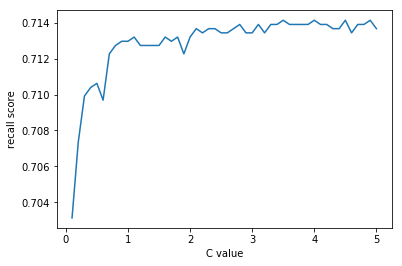

In [57]:
C_start = 0.1
C_end = 5
C_inc = 0.1
 
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [60]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)


print("Accuracy: {0:.4f}",format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: {0:.4f} 0.7330260791366906
[[3135 1126]
 [1249 3386]]

Classification Report
             precision    recall  f1-score   support

          1       0.72      0.74      0.73      4261
          0       0.75      0.73      0.74      4635

avg / total       0.73      0.73      0.73      8896

0.735742783384


## Logistic Regression CV (Cross Validation)

In [61]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [62]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy 0.7230
[[3089 1172]
 [1292 3343]]

Classification Report
             precision    recall  f1-score   support

          1       0.71      0.72      0.71      4261
          0       0.74      0.72      0.73      4635

avg / total       0.72      0.72      0.72      8896



In [80]:
df_school[df_school['year'] == 2018]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
2774,2018.0,Abilene Christian,27.032258,13.000000,6.677419,9.225806,33.186264,15.064516,8.032258,3.870968,...,20.903226,73.741935,70.935484,0.469,0.331,0.700,0.516,0.444444,-8.90,-6.75
2775,2018.0,Air Force,23.645161,13.161290,8.064516,9.741935,32.395421,14.354839,6.483871,2.516129,...,17.967742,68.516129,72.387097,0.419,0.331,0.734,0.387,0.333333,-3.98,2.06
2776,2018.0,Akron,24.781250,12.656250,9.531250,9.375000,33.019531,13.031250,5.906250,2.531250,...,19.906250,71.750000,75.343750,0.435,0.360,0.696,0.438,0.333333,-6.66,-1.75
2777,2018.0,Alabama A&M,21.709677,11.129032,5.870968,10.580645,33.400624,10.967742,3.967742,1.580645,...,16.322581,60.419355,76.354839,0.397,0.303,0.647,0.097,0.166667,-23.83,-7.90
2778,2018.0,Alabama-Birmingham,28.636364,12.818182,6.757576,10.121212,37.844812,16.939394,5.393939,3.818182,...,14.848485,76.848485,69.787879,0.487,0.345,0.750,0.606,0.555556,4.65,-0.90
2779,2018.0,Alabama State,24.225806,13.483871,6.741935,12.709677,36.073881,10.129032,5.451613,4.193548,...,20.903226,68.677419,78.612903,0.409,0.328,0.646,0.258,0.444444,-18.41,-8.47
2780,2018.0,Alabama,25.393939,15.515152,6.333333,9.939394,36.062443,12.727273,6.484848,5.545455,...,18.878788,72.636364,69.484848,0.461,0.325,0.671,0.576,0.444444,13.53,10.38
2781,2018.0,Albany (NY),26.218750,16.031250,5.750000,11.781250,36.850586,12.656250,4.687500,2.843750,...,16.500000,74.218750,68.187500,0.457,0.367,0.754,0.688,0.625000,0.20,-5.22
2782,2018.0,Alcorn State,24.718750,13.218750,7.468750,9.500000,34.203125,13.093750,6.250000,2.656250,...,19.156250,70.125000,74.625000,0.433,0.338,0.707,0.344,0.388889,-17.81,-8.35
2783,2018.0,American,23.266667,10.866667,7.966667,7.933333,28.702222,12.233333,7.233333,3.266667,...,18.333333,65.366667,73.833333,0.432,0.337,0.664,0.200,0.166667,-14.40,-5.93


In [178]:
school_names_south = [
    # south region
    'Virginia', 'Maryland-Baltimore County',
    'Creighton', 'Kansas State',
    'Kentucky', 'Davidson',
    'Arizona', 'Buffalo',
    'Miami (FL)','Loyola (IL)',
    'Tennessee', 'Wright State',
    'Nevada', 'Texas',
    'Cincinnati', 'Georgia State'
    ]
school_names_west = [
    # west region
    'Xavier','North Carolina Central', #or 'Texas Southern',
    'Missouri','Florida State',
    'Ohio State', 'South Dakota State',
    'Gonzaga', 'North Carolina-Greensboro',
    'Houston', 'San Diego State',
    'Michigan', 'Montana',
    'Texas A&M', 'Providence',
    'North Carolina', 'Lipscomb'
    ]
school_names_east = [
    # east region
    'Villanova', 'Long Island University', # or 'Radford',
    'Virginia Tech', 'Alabama',
    'West Virginia', 'Murray State',
    'Wichita State', 'Marshall',
    'Florida', 'St. Bonaventure', # or 'UCLA',
    'Texas Tech', 'Stephen F. Austin',
    'Arkansas', 'Butler',
    'Purdue', 'Cal State Fullerton'
    ]
school_names_midwest = [
    # mid-west region
    'Kansas', 'Pennsylvania',
    'Seton Hall', 'North Carolina State',
    'Clemson', 'New Mexico State',
    'Auburn', 'College of Charleston',
    'Texas Christian', 'Arizona State', # or 'Syracuse',
    'Michigan State', 'Bucknell',
    'Rhode Island', 'Oklahoma',
    'Duke', 'Iona'  
    ]


In [196]:
def get_matchups_stats(schools):    
    i = 0 
    t1_stats = []
    t2_stats = []
    if(not is_power_of_two(len(schools))):
        print('ERROR: invalid number of school names')
        return False
    while i < len(schools):
        t1_name = schools[i]
        t2_name = schools[i + 1]
        #print(t1_name, t2_name)
        t1_stats.append(get_school_stats(2018, t1_name))
        t2_stats.append(get_school_stats(2018, t2_name))
        i = i + 2
    matchup_stats = create_team_stats_df(range(0,int(len(schools)/2)), t1_stats, t2_stats)
    return matchup_stats
def is_power_of_two(num):
    return ((num & (num - 1)) == 0) and num != 0
def get_matchup_winners(matchup_stats, school_names):
    x_tourney = matchup_stats[feature_col_names].values
    y_tourney = lr_cv_model.predict(x_tourney)
    i = 0
    winners = []
    for y_val in y_tourney:
        t1_name = school_names[i]
        t2_name = school_names[i + 1]
        print(t1_name,'vs.', t2_name,'(team 1 won=', y_val,')')
        if(y_val):
            winners.append(t1_name)
        else:
            winners.append(t2_name)
        i = i + 2
    return winners
def evaluate_winner(schools,sub_bracket_name):        
    remaining_teams = schools
    i = 1
    while(len(remaining_teams) > 1):
        print("---",sub_bracket_name," round ",i,"---")
        matchup_stats = get_matchups_stats(remaining_teams)
        remaining_teams = get_matchup_winners(matchup_stats,remaining_teams)
        i = i + 1
    winner = remaining_teams[0]
    print('Winner of ',sub_bracket_name,':',winner)
    return winner


In [198]:
final_four = [evaluate_winner(school_names_south, "South"), evaluate_winner(school_names_west,"West"),
              evaluate_winner(school_names_east, "East"), evaluate_winner(school_names_midwest, "MidWest")]


--- South  round  1 ---
Virginia vs. Maryland-Baltimore County (team 1 won= 1 )
Creighton vs. Kansas State (team 1 won= 1 )
Kentucky vs. Davidson (team 1 won= 1 )
Arizona vs. Buffalo (team 1 won= 1 )
Miami (FL) vs. Loyola (IL) (team 1 won= 1 )
Tennessee vs. Wright State (team 1 won= 1 )
Nevada vs. Texas (team 1 won= 1 )
Cincinnati vs. Georgia State (team 1 won= 1 )
--- South  round  2 ---
Virginia vs. Creighton (team 1 won= 1 )
Kentucky vs. Arizona (team 1 won= 1 )
Miami (FL) vs. Tennessee (team 1 won= 0 )
Nevada vs. Cincinnati (team 1 won= 0 )
--- South  round  3 ---
Virginia vs. Kentucky (team 1 won= 1 )
Tennessee vs. Cincinnati (team 1 won= 1 )
--- South  round  4 ---
Virginia vs. Tennessee (team 1 won= 1 )
Winner of  South : Virginia
--- West  round  1 ---
Xavier vs. North Carolina Central (team 1 won= 1 )
Missouri vs. Florida State (team 1 won= 1 )
Ohio State vs. South Dakota State (team 1 won= 1 )
Gonzaga vs. North Carolina-Greensboro (team 1 won= 1 )
Houston vs. San Diego State 

In [193]:
final_four

['Virginia', 'Xavier', 'Villanova', 'Duke']

In [199]:
champ = evaluate_winner(final_four, "FinalFour")

--- FinalFour  round  1 ---
Virginia vs. Xavier (team 1 won= 1 )
Villanova vs. Duke (team 1 won= 1 )
--- FinalFour  round  2 ---
Virginia vs. Villanova (team 1 won= 1 )
Winner of  FinalFour : Virginia
